# Исследование объявлений о продаже квартир

**Описание проекта:**

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель проекта:**

Установить параметры, которые помогут определить рыночную стоимость объектов недвижимости на основе анализа данных о продаже квартир в Санкт-Петербурге и соседних населённых пунктах для построения автоматизированной системы выявления аномалий и признаков мошеннической деятельности.

**План работы:**
1. Открыть файл с данными и изучить общую информацию.
2. Провести предобработку данных.
3. Добавить в таблицу новые столбцы со следующими параметрами:
   - цена одного квадратного метра;
   - день недели публикации объявления;
   - месяц публикации объявления;
   - год публикации объявления;
   - тип этажа квартиры;
   - расстояние до центра города в километрах.
4. Провести анализ следующих параметров объектов:
   - общая площадь;
   - жилая площадь;
   - площадь кухни;
   - цена объекта;
   - количество комнат;
   - высота потолков;
   - тип этажа квартиры («первый», «последний», «другой»);
   - общее количество этажей в доме;
   - расстояние до центра города в метрах;
   - расстояние до ближайшего парка.
5. Изучить, как быстро продавались квартиры.
6. Выяснить, факторы больше всего влияют на общую стоимость объекта.
7. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
8. Вычислить среднюю цену каждого километра квартир в Санкт-Петербурге.


**Описание данных:**
- `'airports_nearest'` — расстояние до ближайшего аэропорта в метрах (м)
- `'balcony'` — число балконов
- `'ceiling_height'` — высота потолков (м)
- `'cityCenters_nearest'` — расстояние до центра города (м)
- `'days_exposition'` — сколько дней было размещено объявление (от публикации до снятия)
- `'first_day_exposition'` — дата публикации
- `'floor'` — этаж
- `'floors_total'` — всего этажей в доме
- `'is_apartment'` — апартаменты (булев тип)
- `'kitchen_area'` — площадь кухни в квадратных метрах (м²)
- `'last_price'` — цена на момент снятия с публикации
- `'living_area'` — жилая площадь в квадратных метрах (м²)
- `'locality_name'` — название населённого пункта
- `'open_plan'` — свободная планировка (булев тип)
- `'parks_around3000'` — число парков в радиусе 3 км
- `'parks_nearest'` — расстояние до ближайшего парка (м)
- `'ponds_around3000'` — число водоёмов в радиусе 3 км
- `'ponds_nearest'` — расстояние до ближайшего водоёма (м)
- `'rooms'` — число комнат
- `'studio'` — квартира-студия (булев тип)
- `'total_area'` — общая площадь квартиры в квадратных метрах (м²)
- `'total_images'` — число фотографий квартиры в объявлении

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-файла-в-датафрейм" data-toc-modified-id="Загрузка-данных-файла-в-датафрейм-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных файла в датафрейм</a></span></li><li><span><a href="#Изучение-общей-информации-о-датафрейме" data-toc-modified-id="Изучение-общей-информации-о-датафрейме-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение общей информации о датафрейме</a></span></li><li><span><a href="#Построение-гистограммы-для-значений-таблицы" data-toc-modified-id="Построение-гистограммы-для-значений-таблицы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Построение гистограммы для значений таблицы</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-наименования-столбцов" data-toc-modified-id="Изменение-наименования-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение наименования столбцов</a></span></li><li><span><a href="#Устранение-дубликатов" data-toc-modified-id="Устранение-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Устранение дубликатов</a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбцах" data-toc-modified-id="Проверка-пропущенных-значений-в-столбцах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка пропущенных значений в столбцах</a></span><ul class="toc-item"><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'ceiling_height'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'ceiling_height'-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'ceiling_height'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'floors_total'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'floors_total'-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'floors_total'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'living_area'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'living_area'-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'living_area'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'kitchen_area'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'kitchen_area'-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'kitchen_area'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'is_apartment'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'is_apartment'-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'is_apartment'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'balcony'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'balcony'-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'balcony'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'parks_around_3000'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'parks_around_3000'-2.3.7"><span class="toc-item-num">2.3.7&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'parks_around_3000'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'ponds_around_3000'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'ponds_around_3000'-2.3.8"><span class="toc-item-num">2.3.8&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'ponds_around_3000'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'parks_nearest'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'parks_nearest'-2.3.9"><span class="toc-item-num">2.3.9&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'parks_nearest'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'ponds_nearest'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'ponds_nearest'-2.3.10"><span class="toc-item-num">2.3.10&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'ponds_nearest'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'airports_nearest'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'airports_nearest'-2.3.11"><span class="toc-item-num">2.3.11&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'airports_nearest'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'city_centers_nearest'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'city_centers_nearest'-2.3.12"><span class="toc-item-num">2.3.12&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'city_centers_nearest'</code></a></span></li><li><span><a href="#Проверка-пропущенных-значений-в-столбце-'days_exposition'" data-toc-modified-id="Проверка-пропущенных-значений-в-столбце-'days_exposition'-2.3.13"><span class="toc-item-num">2.3.13&nbsp;&nbsp;</span>Проверка пропущенных значений в столбце <code>'days_exposition'</code></a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-2.3.14"><span class="toc-item-num">2.3.14&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Изменение-типа-данных-в-столбцах" data-toc-modified-id="Изменение-типа-данных-в-столбцах-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изменение типа данных в столбцах</a></span><ul class="toc-item"><li><span><a href="#Изменение-типа-данных-в-столбце-'floors_total'" data-toc-modified-id="Изменение-типа-данных-в-столбце-'floors_total'-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Изменение типа данных в столбце <code>'floors_total'</code></a></span></li><li><span><a href="#Изменение-типа-данных-в-столбце-'balcony'" data-toc-modified-id="Изменение-типа-данных-в-столбце-'balcony'-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Изменение типа данных в столбце <code>'balcony'</code></a></span></li><li><span><a href="#Изменение-типа-данных-в-столбце-'is_apartment'" data-toc-modified-id="Изменение-типа-данных-в-столбце-'is_apartment'-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Изменение типа данных в столбце <code>'is_apartment'</code></a></span></li><li><span><a href="#Изменение-типа-данных-в-столбце-'first_day_exposition'" data-toc-modified-id="Изменение-типа-данных-в-столбце-'first_day_exposition'-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Изменение типа данных в столбце <code>'first_day_exposition'</code></a></span></li></ul></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span><ul class="toc-item"><li><span><a href="#Добавление-столбца-'one_sq_m_price'" data-toc-modified-id="Добавление-столбца-'one_sq_m_price'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Добавление столбца <code>'one_sq_m_price'</code></a></span></li><li><span><a href="#Добавление-столбца-'city_centers_km'" data-toc-modified-id="Добавление-столбца-'city_centers_km'-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Добавление столбца <code>'city_centers_km'</code></a></span></li><li><span><a href="#Добавление-столбцов-'exposition_weekday',-'exposition_month',-'exposition_year'" data-toc-modified-id="Добавление-столбцов-'exposition_weekday',-'exposition_month',-'exposition_year'-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Добавление столбцов <code>'exposition_weekday'</code>, <code>'exposition_month'</code>, <code>'exposition_year'</code></a></span></li><li><span><a href="#Добавление-столбца-'floor_type'" data-toc-modified-id="Добавление-столбца-'floor_type'-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Добавление столбца <code>'floor_type'</code></a></span></li></ul></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-значений-столбцов" data-toc-modified-id="Анализ-значений-столбцов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ значений столбцов</a></span><ul class="toc-item"><li><span><a href="#Анализ-столбца-'total_area'" data-toc-modified-id="Анализ-столбца-'total_area'-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Анализ столбца <code>'total_area'</code></a></span></li><li><span><a href="#Анализ-столбца-'living_area'" data-toc-modified-id="Анализ-столбца-'living_area'-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Анализ столбца <code>'living_area'</code></a></span></li><li><span><a href="#Анализ-столбца-'kitchen_area'" data-toc-modified-id="Анализ-столбца-'kitchen_area'-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Анализ столбца <code>'kitchen_area'</code></a></span></li><li><span><a href="#Анализ-столбца-'last_price'" data-toc-modified-id="Анализ-столбца-'last_price'-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Анализ столбца <code>'last_price'</code></a></span></li><li><span><a href="#Анализ-столбца-'rooms'" data-toc-modified-id="Анализ-столбца-'rooms'-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Анализ столбца <code>'rooms'</code></a></span></li><li><span><a href="#Анализ-столбца-'ceiling_height'" data-toc-modified-id="Анализ-столбца-'ceiling_height'-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Анализ столбца <code>'ceiling_height'</code></a></span></li><li><span><a href="#Анализ-столбца-'floor_type'" data-toc-modified-id="Анализ-столбца-'floor_type'-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Анализ столбца <code>'floor_type'</code></a></span></li><li><span><a href="#Анализ-столбца-'floors_total'" data-toc-modified-id="Анализ-столбца-'floors_total'-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>Анализ столбца <code>'floors_total'</code></a></span></li><li><span><a href="#Анализ-столбца-'city_centers_nearest'" data-toc-modified-id="Анализ-столбца-'city_centers_nearest'-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>Анализ столбца <code>'city_centers_nearest'</code></a></span></li><li><span><a href="#Анализ-столбца-'parks_nearest'" data-toc-modified-id="Анализ-столбца-'parks_nearest'-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span>Анализ столбца <code>'parks_nearest'</code></a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.1.11"><span class="toc-item-num">4.1.11&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Анализ-скорости-продажи-квартир" data-toc-modified-id="Анализ-скорости-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ скорости продажи квартир</a></span></li><li><span><a href="#Анализ-факторов,-влияющих-на-общую-стоимость-объекта" data-toc-modified-id="Анализ-факторов,-влияющих-на-общую-стоимость-объекта-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ факторов, влияющих на общую стоимость объекта</a></span><ul class="toc-item"><li><span><a href="#Влияние-общей-площади-на-стоимость-объекта" data-toc-modified-id="Влияние-общей-площади-на-стоимость-объекта-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Влияние общей площади на стоимость объекта</a></span></li><li><span><a href="#Влияние-жилой-площади-на-стоимость-объекта" data-toc-modified-id="Влияние-жилой-площади-на-стоимость-объекта-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Влияние жилой площади на стоимость объекта</a></span></li><li><span><a href="#Влияние-площади-кухни-на-стоимость-объекта" data-toc-modified-id="Влияние-площади-кухни-на-стоимость-объекта-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Влияние площади кухни на стоимость объекта</a></span></li><li><span><a href="#Влияние-количества-комнат-на-стоимость-объекта" data-toc-modified-id="Влияние-количества-комнат-на-стоимость-объекта-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Влияние количества комнат на стоимость объекта</a></span></li><li><span><a href="#Влияние-типа-этажа-на-стоимость-объекта" data-toc-modified-id="Влияние-типа-этажа-на-стоимость-объекта-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Влияние типа этажа на стоимость объекта</a></span></li><li><span><a href="#Влияние-дня-недели-размещения-объявления-на-стоимость-объекта" data-toc-modified-id="Влияние-дня-недели-размещения-объявления-на-стоимость-объекта-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Влияние дня недели размещения объявления на стоимость объекта</a></span></li><li><span><a href="#Влияние-месяца-размещения-объявления-на-стоимость-объекта" data-toc-modified-id="Влияние-месяца-размещения-объявления-на-стоимость-объекта-4.3.7"><span class="toc-item-num">4.3.7&nbsp;&nbsp;</span>Влияние месяца размещения объявления на стоимость объекта</a></span></li><li><span><a href="#Влияние-года-размещения-объявления-на-стоимость-объекта" data-toc-modified-id="Влияние-года-размещения-объявления-на-стоимость-объекта-4.3.8"><span class="toc-item-num">4.3.8&nbsp;&nbsp;</span>Влияние года размещения объявления на стоимость объекта</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.3.9"><span class="toc-item-num">4.3.9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Анализ-средней-цены-одного-квадратного-метра-квартиры-в-населённых-пунктах" data-toc-modified-id="Анализ-средней-цены-одного-квадратного-метра-квартиры-в-населённых-пунктах-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ средней цены одного квадратного метра квартиры в населённых пунктах</a></span></li><li><span><a href="#Анализ-средней-цены-каждого-километра-в-расстоянии-до-центра-Санкт-Петербурга" data-toc-modified-id="Анализ-средней-цены-каждого-километра-в-расстоянии-до-центра-Санкт-Петербурга-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ средней цены каждого километра в расстоянии до центра Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Откройте файл с данными и изучите общую информацию. 

#### Загрузка данных файла в датафрейм

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Отключаем ограничение по отображению колонок в таблице.

In [2]:
pd.set_option('display.max_columns', None)

Загружаем данные из csv-файла в датафрейм, проверим 5 первых и последних строк.

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Изучение общей информации о датафрейме

Изучим общую информацию.

In [6]:
data.select_dtypes(exclude=[np.number]).columns

Index(['first_day_exposition', 'is_apartment', 'studio', 'open_plan',
       'locality_name'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

А также проверим количество и долю отсутствующих данных.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


Проверим долю, которую занимают пропущенные значения во всей таблице.

In [10]:
round((data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100), 1)

19.5

Изучим характеристики числовых данных таблицы.

In [11]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Построение гистограммы для значений таблицы

Построим гистограмму для всех числовых столбцов таблицы.

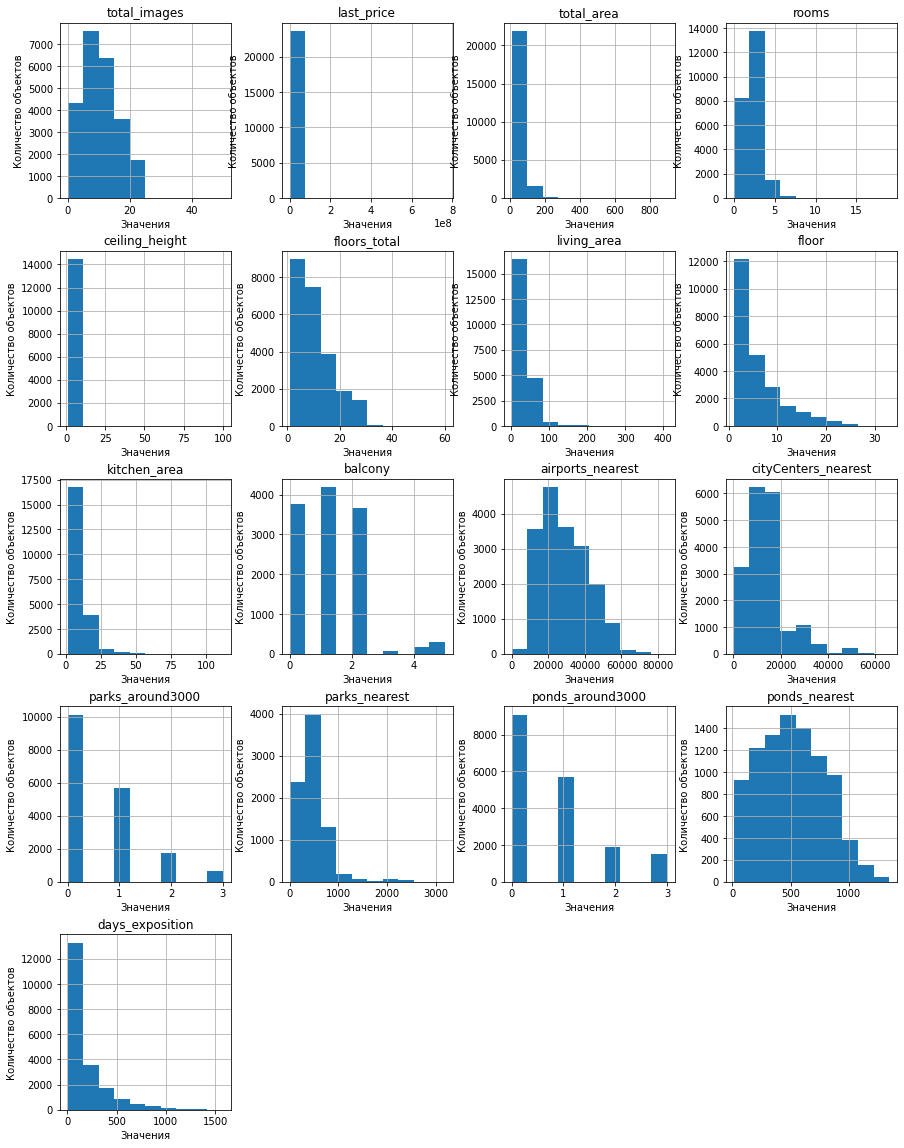

In [12]:
# Построение гистограмм
axes = data.hist(figsize=(15, 20))

# Добавление подписей осей
for ax in axes.flatten():
    ax.set_xlabel('Значения')
    ax.set_ylabel('Количество объектов')   

plt.show()

#### Вывод

Судя по полученным данным, в таблице присутствуют пропущенные значения в нескольких столбцах, которые необходимо обработать. Пропуски занимают 19,5% от всех данных таблицы.

В некоторых столбцах присутствуют значения, очень сильно выделяющиеся среди остальных, которые необходимо изучить подробнее.

Необходимо исправить наименование столбцов `'cityCenters_nearest'`, `'parks_around3000'` и `'ponds_around3000'`.

Также в столбцах `'first_day_exposition'` и `'is_apartment'` указаны неверные типы данных, поэтому их нужно изменить на `'datetime'` и `'bool'` соответственно. Также в столбцах `'floors_total'` и `'balcony'` типом данных указаны вещественные числа, когда как такие данные могут быть пресдтавлены только в виде целых чисел, поэтому их необходимо исправить.

### Предобработка данных

Сначала поправим наименования столбцов.

Затем, прежде чем заполнять пропуски в данных, необходимо избавиться от дубликатов, чтобы можно было проводить расчеты медианы, группируя по населенному пункту.

После этого изучим пропущенные значения в столбцах.

И уже в конце исправим некорректные типы данных в столбцах.

#### Изменение наименования столбцов

Приведем в порядок наименования столбцов `'cityCenters_nearest'`, `'parks_around3000'` и `'ponds_around3000'`.

In [13]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

Проверяем результат.

In [14]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Устранение дубликатов
Сперва проверим, нет ли в таблице явных дубликатов.

In [15]:
data.duplicated().sum()

0

Явных дубликатов в таблице нет, поэтому двигаемся дальше.

Единственный столбец, который мы можем проверить на наличие неявнях дубликатов - это `'locality_name'`.
Но сперва разберемся с данными, где не указан населенный пункт.

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [16]:
print(data['locality_name'].isna().sum())
data[(data['locality_name'].isna())].head()

49


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,False,False,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,False,False,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,False,False,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


По данным из других столбцов нет возможности определить, из какого населенного пункта были объекты. Т.к. данный столбец несет ключевую информацию, информация из других столбцов теряет смысл и не имет ценности. Доля пропущенных значений совсем мала, поэтому их удаление не повлияет на результат.

In [17]:
data = data.dropna(subset=['locality_name'])

Проверяем результат.

In [18]:
data['locality_name'].isna().sum()

0

Теперь для дальнейшей работы изучим уникальные значения этого столбца.

In [19]:
print(len(data['locality_name'].unique()))
sorted(data['locality_name'].unique())

364


['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

В таблице имеется 364 уникальных значений, но среди них много неявнях дубликатов, в которых отличается написание слов `'поселок'` и `'посёлок'`. Еще есть дубликаты, где по-разному указан тип населенного пункта, но название у них одно:
- `'коттеджный посёлок'`,
- `'городской поселок'`,
- `'посёлок городского типа'`,
- `'посёлок при железнодорожной станции'`,
- `'посёлок станции'`,
- `'посёлок'`,
- `'село'`,
- `'деревня'`,
- `'садовое товарищество'`,
- `'садоводческое некоммерческое товарищество'`,
- или без типа, указано только название населенного пункта.

Также есть населенные пункты, у которых отличается написание названия:
- `'Кингисепп'` или `'Кингисеппский'`,
- `'Коммунар'` или `'Коммунары'`,
- `'Кузьмоловский'` или `'Кузьмолово'`,
- `'Сапёрное'` или `'Сапёрный'`.

Лучше всего будет создать новый столбец, где будет указано только название населенного пункта без типа. Но сперва стоит привести названия населенных пунктов к единообразию. 

Создадим списки названий населенных пунктов, какие нужно заменить и на какие они должны быть заменены. 

In [20]:
locality_rename_list = [('Кингисеппский', 'Кингисепп'), ('Коммунары', 'Коммунар'), ('Кузьмолово', 'Кузьмоловский'), ('Сапёрный', 'Сапёрное')]

Проверим количество неявных дублей названий населенных пунктов при помощи функции `'amount_name_check'` и цикла.

In [21]:
def amount_name_check(column, value):
    print(f'{value} - {data[column].str.contains(value).sum()}')

In [22]:
for name, _ in locality_rename_list:
    amount_name_check('locality_name', name)

Кингисеппский - 2
Коммунары - 1
Кузьмолово - 7
Сапёрный - 6


Далее напишем функцию `'locality_rename'`, которая заменит некорректные названия населенных пунктов на новые и применим ее при помощи цикла.

In [23]:
def locality_rename(column, old_name, new_name):
    return data[column].str.replace(old_name, new_name)

In [24]:
for old_name, new_name in locality_rename_list:
    data['locality_name'] = locality_rename('locality_name', old_name, new_name)

Проверяем результат.

In [25]:
for name, _ in locality_rename_list:
    amount_name_check('locality_name', name)

Кингисеппский - 0
Коммунары - 0
Кузьмолово - 0
Сапёрный - 0


Теперь займемся созданием нового столбца, где будет указано только название населенного пункта. Сохраним в переменную `'trash_words'` список слов, которые мы хотим отделить от названия населенных пунктов.

In [26]:
data['clear_locality_name'] = data['locality_name']

trash_words = ['поселок ', 'посёлок ', 'коттеджный ', 'городской ', 'городского ', 'типа ', 'при ', 'железнодорожной ', 'станции ', 'село ', 'деревня ', 'садовое ', 'товарищество ', 'садоводческое ', 'некоммерческое ']

Проверим количество неявных дублей названий населенных пунктов при помощи функции `'amount_name_check'` и цикла.

In [27]:
for word in trash_words:
    amount_name_check('clear_locality_name', word)

поселок  - 552
посёлок  - 2108
коттеджный  - 3
городской  - 187
городского  - 363
типа  - 363
при  - 2
железнодорожной  - 2
станции  - 15
село  - 32
деревня  - 945
садовое  - 4
товарищество  - 5
садоводческое  - 1
некоммерческое  - 1


При помощи цикла и ранее созданной функции `'locality_rename'` очистим новый столбец `'clear_locality_name'` от значений из переменной `'trash_words'`.

In [28]:
for word in trash_words:
    data['clear_locality_name'] = locality_rename('clear_locality_name', word, '')

Проверяем результат.

In [29]:
for word in trash_words:
    amount_name_check('clear_locality_name', word)

поселок  - 0
посёлок  - 0
коттеджный  - 0
городской  - 0
городского  - 0
типа  - 0
при  - 0
железнодорожной  - 0
станции  - 0
село  - 0
деревня  - 0
садовое  - 0
товарищество  - 0
садоводческое  - 0
некоммерческое  - 0


In [30]:
print(len(data['clear_locality_name'].unique()))
sorted(data['clear_locality_name'].unique())

301


['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

Мы избавились от 63 неявных дубликатов, теперь список уникальных значений выглядит корректно.
Выведем таблицу на экран, чтобы наглядно увидеть результат.

In [31]:
data[data['clear_locality_name'] != 'Санкт-Петербург'].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,Ломоносов
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Сертолово
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.00,5,NaN,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,Петергоф
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,NaN,6.0,17.00,1,NaN,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,Пушкин
20,12,6120000.0,80.00,2017-09-28T00:00:00,3,2.70,27.0,48.00,11,NaN,False,False,12.00,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0,Парголово
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Кудрово


В конце таблицы мы видим новый столбец, где корректно отображаются наименования населенных пунктов, который мы будем использовать в дальнейших расчетах.

#### Проверка пропущенных значений в столбцах

##### Проверка пропущенных значений в столбце `'ceiling_height'`

Сперва посмотрим количество и список данных с пропущенными значениями в столбце.

In [32]:
print(data['ceiling_height'].isna().sum())
data[(data['ceiling_height'].isna())].head()

9160


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово


Нулевые значения можно заменить медианным, т.к. данные из этого столбца не являются критически важными, чтобы удалять эти строки. Проверим медианное значение.

In [33]:
data['ceiling_height'].median()

2.65

Медианное значение выглядит реалистично, поэтому подставляем его на место пропущенных.

In [34]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Проверяем результат.

In [35]:
data['ceiling_height'].isna().sum()

0

**Вывод**

Вероятнее всего пропущенные значения возникли из-за человеческого фактора, т.к. некоторые пользователи не считают нужным указывать подобную информацию. 

Пропуски заполнены медианным значением.

##### Проверка пропущенных значений в столбце `'floors_total'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [36]:
print(data['floors_total'].isna().sum())
data[(data['floors_total'].isna())].head()

85


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,Санкт-Петербург
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,Санкт-Петербург
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,Санкт-Петербург
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,Санкт-Петербург
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,Санкт-Петербург


По данным из других столбцов нет возможности определить пропущенные значения столбца, поэтому оставим их как есть.

**Вывод**

Вероятнее всего пропущенные значения возникли из-за человеческого фактора, т.к. некоторые пользователи не считают нужным указывать подобную информацию. 

Пропуски оставлены без изменений.

##### Проверка пропущенных значений в столбце `'living_area'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [37]:
print(data['living_area'].isna().sum())
data[(data['living_area'].isna())].head()

1898


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Коммунар
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,Красный Бор
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,Санкт-Петербург


По данным из других столбцов нет возможности определить пропущенные значения столбца, поэтому оставим их как есть.

**Вывод**

Вероятнее всего пропущенные значения возникли из-за человеческого фактора, т.к. некоторые пользователи не считают нужным указывать подобную информацию. 

Пропуски оставлены без изменений.

##### Проверка пропущенных значений в столбце `'kitchen_area'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [38]:
print(data['kitchen_area'].isna().sum())
data[(data['kitchen_area'].isna())].head()

2269


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Коммунар
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,Красный Бор
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,Санкт-Петербург
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,Санкт-Петербург


Заполним пропущенные данные произведением нежилой площади (разница столбцов `'total_area'` и `'living_area'`) и медианы доли, которую занимает площадь кухни в нежилой площади. 

In [39]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = (data['kitchen_area'] / (data['total_area'] - data['living_area'])).median() * (data['total_area'] - data['living_area'])

Проверим, присутствуют ли среди данных объекты, в которых сумма значений столбцов `'kitchen_area'` и `'living_area'` превышает значение столбца `'total_area'`. В таком случае заменим значения в столбце `'kitchen_area'` на разницу столбцов `'total_area'` и `'living_area'`.

In [40]:
data[['kitchen_area', 'living_area','total_area']][(data['kitchen_area'] + data['living_area']) > data['total_area']]

,kitchen_area,living_area,total_area
184,6.20,26.10,30.20
545,5.00,20.00,23.80
551,9.28,30.55,31.59
601,7.00,48.30,53.70
696,23.43,23.43,34.69
...,...,...,...
21824,8.60,38.00,44.00
21868,8.00,30.60,34.30
21915,32.40,62.00,91.40
21956,8.00,44.00,46.00


В таком случае заменим значения в столбце `'kitchen_area'` на разницу столбцов `'total_area'` и `'living_area'`.

In [41]:
data.loc[(data['kitchen_area'] + data['living_area']) > data['total_area'], 'kitchen_area'] = (data['total_area'] - data['living_area'])

Проверяем результат.

In [42]:
data[['kitchen_area', 'living_area','total_area']][(data['kitchen_area'] + data['living_area']) > data['total_area']]

,kitchen_area,living_area,total_area


Еще раз проверим пропущенные значения в столбце.

In [43]:
print(data['kitchen_area'].isna().sum())
data[(data['kitchen_area'].isna())].head()

1460


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Коммунар
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,Красный Бор
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,Санкт-Петербург
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,Санкт-Петербург


Осталось еще много пропусков, но в этих строках также отсутствует значение в столбце `'living_area'`, поэтому рассчитать значение таким же путем в этих данных невозможно.

Проверим, действительно ли все строки с пропусками в `'kitchen_area'` имеют также пропущенные значения в столбце `'living_area'`.

In [44]:
((data['kitchen_area'].isna()) & (data['living_area'].isna())).sum()

1460

Предположение верное, значения совпадают. По данным из других столбцов нет возможности определить пропущенные значения столбца, поэтому оставим их как есть.

**Вывод**

Вероятнее всего пропущенные значения возникли из-за человеческого фактора, т.к. некоторые пользователи не считают нужным указывать подобную информацию. 

Пропуски заполнены произведением нежилой площади и медианы доли, которую занимает площадь кухни в нежилой площади. А те пропуски, в которых также пропущены значения в `'living_area'`, оставлены без изменений.

##### Проверка пропущенных значений в столбце `'is_apartment'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [45]:
print(data['is_apartment'].isna().sum())
data[(data['is_apartment'].isna())].head()

20890


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


Пропущенные значения занимают 88% от общей массы данных! Проверим уникальные значения столбца и их количество.

In [46]:
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Количество отрицательных результатов больше положительных, и это логично. Можно предположить, что пользователи при публикации объявления не добавили эту информацию, т.к. на рынке недвижимости в подавляющем большинстве представлены объекты, не относящиеся к апартаментам.

Лучше всего будет заполнить недостающие данные значением `'False'`.

In [47]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

Проверяем результат.

In [48]:
data['is_apartment'].isna().sum()

0

**Вывод**

Вероятнее всего пропущенные значения возникли из-за человеческого фактора, т.к. некоторые пользователи не считают нужным указывать подобную информацию. 

Пропуски заполнены значением `'False'`.

##### Проверка пропущенных значений в столбце `'balcony'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [49]:
print(data['balcony'].isna().sum())
data[(data['balcony'].isna())].head()

11513


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,Санкт-Петербург


Почти половина значений пропущена. Можно предположить, что пропущенное значение означает отсутствие балкона.

Лучше всего будет заполнить недостающие данные значением `'0'`.

In [50]:
data['balcony'] = data['balcony'].fillna(0)

Проверяем результат.

In [51]:
data['balcony'].isna().sum()

0

**Вывод**

Пропущенные значения возникли из-за настроек сервиса, т.к. в сервисе невозможно указать нулевое значение параметра.

Пропуски заполнены значением `'0'`.

##### Проверка пропущенных значений в столбце `'parks_around_3000'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [52]:
print(data['parks_around_3000'].isna().sum())
data[(data['parks_around_3000'].isna())].head()

5510


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Сертолово
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Кудрово
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Коммунар


Можно предположить, что что пропущенное значение означает отсутствие данного параметра, т.к. пользователи при публикации объявления скорее всего бы добавили информацию, которая потенциально могла бы увеличить стоимость объекта.

По данным из других столбцов нет возможности определить пропущенные значения столбца. Пропуски в этом стобце не помешают дальнейшему анализу, поэтому оставим их как есть.

**Вывод**

Пропущенные значения могли возникнуть из-за настроек сервиса, т.к. в сервисе невозможно указать нулевое значение параметра. 

Также есть вероятность, что автоматическое заполнение информации на основе картографических данных может работать не во всех населенных пунктах.

Пропуски оставлены без изменений.

##### Проверка пропущенных значений в столбце `'ponds_around_3000'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [53]:
print(data['ponds_around_3000'].isna().sum())
data[(data['ponds_around_3000'].isna())].head()

5510


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Сертолово
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Кудрово
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Коммунар


Можно предположить, что что пропущенное значение означает отсутствие данного параметра, т.к. пользователи при публикации объявления скорее всего бы добавили информацию, которая потенциально могла бы увеличить стоимость объекта.

По данным из других столбцов нет возможности определить пропущенные значения столбца. Пропуски в этом стобце не помешают дальнейшему анализу, поэтому оставим их как есть.

**Вывод**

Пропущенные значения могли возникнуть из-за настроек сервиса, т.к. в сервисе невозможно указать нулевое значение параметра. 

Также есть вероятность, что автоматическое заполнение информации на основе картографических данных может работать не во всех населенных пунктах.

Пропуски оставлены без изменений.

##### Проверка пропущенных значений в столбце `'parks_nearest'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [54]:
print(data['parks_nearest'].isna().sum())
data[(data['parks_nearest'].isna())].head()

15586


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино


По данным из других столбцов нет возможности определить пропущенные значения столбца, поэтому оставим их как есть.

Проверим, есть ли в данном столбце строки с пропущенными данными, но у которых указано количество ближайших парков от одного и более. 

In [55]:
data.loc[(data['parks_around_3000'] != 0) & (data['parks_nearest'].isna()), 'parks_nearest'].count()

0

**Вывод**

Пропущенные значения здесь напрямую связаны с другим столбцом. Если нет ни одного ближайшего парка, то и логично, что нет никаких данных о расстоянии.

Пропуски оставлены без изменений.

##### Проверка пропущенных значений в столбце `'ponds_nearest'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [56]:
print(data['ponds_nearest'].isna().sum())
data[(data['ponds_nearest'].isna())].head()

14565


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино


По данным из других столбцов нет возможности определить пропущенные значения столбца, поэтому оставим их как есть.

Проверим, есть ли в данном столбце строки с пропущенными данными, но у которых указано количество ближайших водоемов от одного и более. 

In [57]:
data.loc[(data['ponds_around_3000'] != 0) & (data['ponds_nearest'].isna()), 'ponds_nearest'].count()

0

**Вывод**

Пропущенные значения здесь напрямую связаны с другим столбцом. Если нет ни одного ближайшего водоема, то и логично, что нет никаких данных о расстоянии.

Пропуски оставлены без изменений.

##### Проверка пропущенных значений в столбце `'airports_nearest'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [58]:
print(data['airports_nearest'].isna().sum())
data[(data['airports_nearest'].isna())].head()

5534


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Сертолово
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Кудрово
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Коммунар


По данным из других столбцов нет возможности определить пропущенные значения столбца, поэтому оставим их как есть.

**Вывод**

Пропущенные значения могли возникнуть из-за человеческого фактора, т.к. некоторые пользователи не считают нужным указывать подобную информацию.

Также есть вероятность, что автоматическое заполнение информации на основе картографических данных может работать не во всех населенных пунктах.

Пропуски оставлены без изменений.

##### Проверка пропущенных значений в столбце `'city_centers_nearest'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [59]:
print(data['city_centers_nearest'].isna().sum())
data[(data['city_centers_nearest'].isna())].head()

5511


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Сертолово
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Кудрово
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Коммунар


По данным из других столбцов нет возможности определить пропущенные значения столбца, поэтому оставим их как есть.

**Вывод**

Пропущенные значения могли возникнуть из-за человеческого фактора, т.к. некоторые пользователи не считают нужным указывать подобную информацию.

Также есть вероятность, что автоматическое заполнение информации на основе картографических данных может работать не во всех населенных пунктах.

Пропуски оставлены без изменений.

##### Проверка пропущенных значений в столбце `'days_exposition'`

Посмотрим количество и список данных с пропущенными значениями в столбце.

In [60]:
print(data['days_exposition'].isna().sum())
data[(data['days_exposition'].isna())].head()

3180


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,Санкт-Петербург
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,False,False,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,False,False,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург


Пропущенные значения составляют 13% от общего числа данных, что очень много. По данным из других столбцов нет возможности определить пропущенные значения столбца, поэтому оставим их как есть. 

Могут быть случаи, когда объявление может закрыться менее, чем за сутки, но это довольно редкое явление. Проверим, сколько объявлений было закрыто за 1-3 дня.

In [61]:
(data['days_exposition'] <= 3).sum()

4

За 1-3 дня было закрыто всего 4 объявления, поэтому это точно не тот случай, когда объявление могло закрыться менее, чем за сутки.

Позже проверим гипотезу, пропуски обозначают то, что эти объявления на момент выгрузки данных не были закрыты и всё ещё размещены на сайте.

**Вывод**

Пропущенные значения могли возникнуть из-за сбоя при копировании, считывании или сохранении данных. Также есть вероятность, что пропущенные значения обозначают то, что эти объявления на момент выгрузки данных не были закрыты и всё ещё размещены на сайте.

Пропуски оставлены без изменений.

##### Общий вывод

Еще раз проверим долю, которую занимают пропущенные значения во всей таблице.

In [62]:
round((data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100), 1)

10.8

10% пропущенных значений файла было восстановлено.

Вероятнее всего пропущенные значения в столбцах `'ceiling_height'` и `'kitchen_area'` возникли из-за человеческого фактора, т.к. некоторые пользователи не считают нужным указывать подобную информацию. Пропуски были заполнены медианными значениями.

У столбцов `'floors_total'`и `'living_area'` пропущенные значения возникли из-за той же проблемлы. Пропуски оставили без изменений.

Столбец `'is_apartment'`, скорее всего, тоже не был заполнен со стороны пользователей. Пропуски заполнены булевым значением `'False'`.

Пропущенные значения в столбце `'balcony'` возникли из-за настроек сервиса, т.к. в сервисе невозможно указать нулевое значение параметра. Вместо пропусков указали 0.

Со столбцами `'parks_around_3000'` и `'ponds_around_3000'` может быть аналогичная проблема. Также есть вероятность, что автоматическое заполнение информации у последних двух упомянутых столбцов на основе картографических данных может работать не во всех населенных пунктах. Пропуски оставили без изменений.

В столбцах `'airports_nearest'` и `'city_centers_nearest'` пропущенные значения могли возникнуть из-за человеческого фактора, также может присутствовать аналогичная проблема с автоматическим заполнением информации на основе картографических данных. Пропуски оставили без изменений.

Пропущенные значения в столбцах `'parks_nearest'` и `'ponds_nearest'` напрямую связаны со столбцами `'parks_around_3000'` и `'ponds_around_3000'`. Если нет ни одного ближайшего парка или водоема, то и логично, что нет никаких данных о расстоянии. Пропуски оставили без изменений.

В столбце `'days_exposition'` пропущенные значения могли возникнуть из-за сбоя при копировании, считывании или сохранении данных. Также есть вероятность, что пропущенные значения обозначают то, что эти объявления на момент выгрузки данных не были закрыты и всё ещё размещены на сайте. Пропуски оставили без изменений.

#### Изменение типа данных в столбцах
Посмотрим еще раз на типы данных, которые необходимо изменить.

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          22190 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В столбцах `'first_day_exposition'` и `'is_apartment'` указан тип данных `'object'`, их нужно заменить на `'datetime64'` и `'bool'` соответственно. 

Также в столбцах `'floors_total'` и `'balcony'` типом данных указан `'float64'`, который необходимо исправить на `'int64'`.

Изменить тип данных важно для того, чтобы было возможно проводить с ними дальнейшие расчеты и строить графики.

##### Изменение типа данных в столбце `'floors_total'`
Проверим уникальные значения столбца.

In [64]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Среди уникальных значений присутствует NaN, поэтому оставим тип данных как есть, иначе не получится создать столбец с типом этажа.

##### Изменение типа данных в столбце `'balcony'`
Проделаем то же самое, что и с предыдущим столбцом.

In [65]:
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

Среди значений также нет дробных, поэтому просто меняем тип данных.

In [66]:
data['balcony'] = data['balcony'].astype('int')

##### Изменение типа данных в столбце `'is_apartment'`

In [67]:
data['is_apartment'].unique()

array([False, True], dtype=object)

По каким-то причинам булевые значения сохранились в виде строки. Поменяем тип данных на `'bool'`.

In [68]:
data['is_apartment'] = data['is_apartment'].astype('bool')

##### Изменение типа данных в столбце `'first_day_exposition'`

In [69]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

Здесь также данные сохранены в виде строки. Поменяем тип данных на `'datetime'`. Так как время не указано и в дальнейших расчетах оно не требуется, то его можно не добавлять.

In [70]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Проверяем результат.

In [71]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          22190 non-null  float64       
 13  balcony         

Теперь типы данных указаны верно, а даты в таблице отображаются корректно.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление столбца `'one_sq_m_price'`
Добавим столбец, в котором будет отражаться цена одного квадратного метра.

In [73]:
data['one_sq_m_price'] = round(data['last_price'] / data['total_area'], 2)

#### Добавление столбца `'city_centers_km'`
Добавим столбец, в котором будет отражаться расстояние до центра города в километрах.

In [74]:
data['city_centers_km'] = round(data['city_centers_nearest'] / 1000)

#### Добавление столбцов `'exposition_weekday'`, `'exposition_month'`, `'exposition_year'`
Добавим столбец, в котором будут указаны день недели, месяц и год публикации объявления.

In [75]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

In [76]:
data['exposition_month'] = data['first_day_exposition'].dt.month

In [77]:
data['exposition_year'] = data['first_day_exposition'].dt.year

Вернемся к проверке гипотезы по пропущенным значениям. Проверим распределение пропущенных значений по годам, чтобы выяснить, может ли это быть связано с тем, что эти объявления всё ещё размещены на сайте. Чтобы подсчиать количество пропущенных значений, сперва заменим их на 0.

In [78]:
data['days_exposition'] = data['days_exposition'].fillna(0)
data[data['days_exposition'] == 0].groupby('exposition_year')['days_exposition'].count()

exposition_year
2014      18
2015      70
2016      67
2017     271
2018     958
2019    1796
Name: days_exposition, dtype: int64

Чем дата ближе к последней, тем пропусков больше. Можно сделать вывод, что эти квартиры еще не проданы.

#### Добавление столбца `'floor_type'`
Добавим столбец, в котором будет отражаться тип этажа квартиры. Создадим функцию `floor_type_determination`, которая будет определять тип.

In [79]:
def floor_type_determination(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [80]:
data['floor_type'] = data.apply(floor_type_determination, axis=1)

Проверяем результат.

In [81]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,Санкт-Петербург,120370.37,16.0,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,19.0,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,14.0,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,7.0,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,8.0,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1,95065.79,NaN,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово,99195.71,19.0,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0,Санкт-Петербург,110544.69,12.0,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино,87454.76,NaN,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург,88524.59,15.0,6,2,2017,другой


В конце таблицы мы видим, что все новые столбцы отображаются, и информация в них корректна.

### Проведите исследовательский анализ данных
#### Анализ значений столбцов

##### Анализ столбца `'total_area'`
Построим гистограмму по данным столбца.

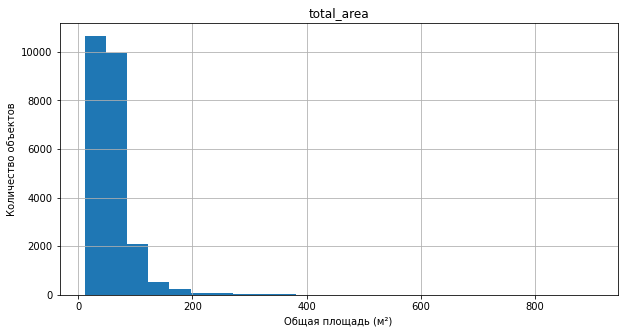

In [82]:
ax = data.hist(column='total_area', bins=24, figsize=(10, 5))
ax[0][0].set(xlabel='Общая площадь (м²)', ylabel='Количество объектов')

plt.show()

По такой гистограмме особо ничего и не скажешь. Исключим слишком большие значения площадей, чтобы посмотреть на остальные. Изучим диаграмму размаха, чтобы понять, какие значения выбиваются из общей массы.

In [83]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

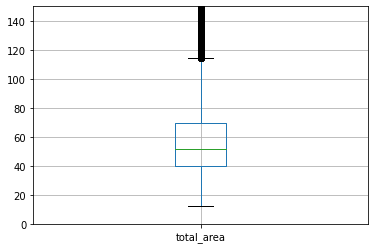

In [84]:
plt.ylim(0, 150)
data.boxplot(column='total_area');

Значения выше 120 отмечаются как выбросы. Проверим количество объектов, которые отмечаются как выбросы.

In [85]:
len(data[data['total_area'] > 125])

939

Значения, которые имеются у 939 объектов, навряд ли могут быть выбросами, и такие объекты действительно могут существовать. Лучше будет округлить и оставить объекты с площадью до 200 м². Проверим количество данных, имеющих площадь от 200 м².

In [86]:
len(data[data['total_area'] > 200])

227

В данном контексте эти данные стоит считать как объекты, которые не относятся к общей массе типовой жилой недвижимости. 

Предварительно посмотрим, как выглядит гистограмма без этих данных.

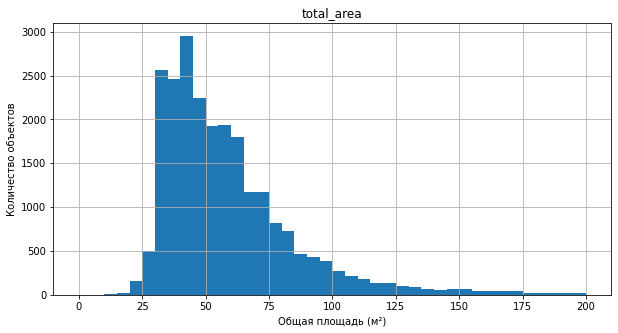

In [87]:
ax = data.hist(column='total_area', bins=40, figsize=(10, 5), range=(0,200))
ax[0][0].set(xlabel='Общая площадь (м²)', ylabel='Количество объектов')

plt.show()

Распределение значений выглядит плавным. По графику видно, что на рынке больше всего представлены объекты, имеющие площадь от 30 до 50 м². Далее по количеству объявлений идут объекты от 50 до 60 м², затем от 65 до 80 м², остальные площади встречаются гораздо реже.

227 от общей доли данных - это менее 1%, поэтому в дальнейшем анализе мы не будем их учитывать.

In [88]:
good_data = data[data['total_area'] <= 200]

**Вывод**

На рынке больше всего представлены объекты, имеющие площадь от 30 до 50 м². Далее по количеству объявлений идут объекты от 50 до 60 м², затем от 65 до 80 м², остальные площади встречаются гораздо реже.

Из нового датафрейма удалены выбивающиеся значения по этому столбцу.

##### Анализ столбца `'living_area'`
Построим гистограмму по данным столбца.

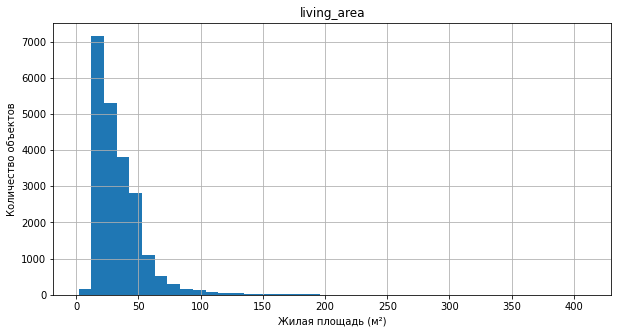

In [89]:
ax = data.hist(column='living_area', bins=40, figsize=(10, 5))
ax[0][0].set(xlabel='Жилая площадь (м²)', ylabel='Количество объектов')

plt.show()

Отсечем слишком большие значения площадей, чтобы увидеть картину четче. Изучим диаграмму размаха, чтобы понять, какие значения выбиваются из общей массы.

In [90]:
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

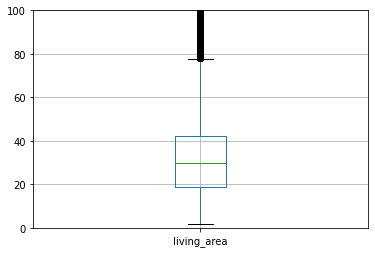

In [91]:
plt.ylim(0, 100)
data.boxplot(column='living_area');

Значения выше 80 отмечаются как выбросы. Проверим количество объектов, которые отмечаются как выбросы.

In [92]:
len(data[data['living_area'] > 80])

685

Значения, которые имеются у 764 объектов, навряд ли могут быть выбросами, и такие объекты действительно могут быть у квартир с большими площадями. Лучше будет оставить объекты с жилой площадью до 120 м², т.к. в среднем медианная доля жилой площади от общей составляет 56,8%. Проверим количество данных, имеющих жилую площадь от 120 м².

In [93]:
len(data[data['living_area'] > 120])

216

В данном контексте эти данные стоит считать как объекты, которые не относятся к общей массе типовой жилой недвижимости. Предварительно посмотрим, как выглядит гистограмма без этих данных.

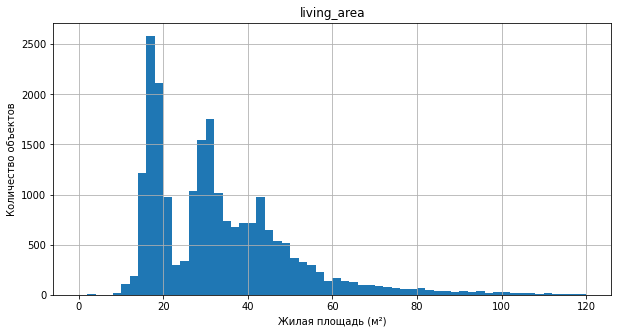

In [94]:
ax = data.hist(column='living_area', bins=60, figsize=(10, 5), range=(0, 120))
ax[0][0].set(xlabel='Жилая площадь (м²)', ylabel='Количество объектов')

plt.show()

График не выглядит нормальным, так как видно два пика данных - в диапазоне 14-22 м² и 26-34 м², а между ними образовался провал. Также подозрительны значения, близкие к нулю.

Тут явно что-то не сходится, так как мы помним по анализу столбца `'total_area'`, что наибольшее количество объектов составляют квартиры площадью 30-50 м², а медианная доля жилой площади от общей составляет 56,8%.

Необходимо проверить значения от 2 до 20 м² на наличие ошибок.

In [95]:
len(data[data['living_area'] < 20])

6227

In [96]:
data.loc[data['living_area'] < 20].sort_values(by='living_area').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
21758,0,2330000.0,23.0,2018-01-01,0,2.65,24.0,2.0,22,False,True,False,8.647059,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0,Мурино,101304.35,NaN,0,1,2018,другой
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6.0,2.0,2,False,False,False,9.000000,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,Санкт-Петербург,122115.38,7.0,1,2,2018,другой
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8.0,3.0,8,False,False,False,16.000000,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,Санкт-Петербург,467553.96,6.0,1,11,2015,последний
3242,7,4440000.0,41.0,2017-07-02,1,2.65,17.0,3.0,17,False,False,False,11.000000,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,Санкт-Петербург,108292.68,13.0,6,7,2017,последний
17582,11,2680000.0,22.0,2018-08-11,0,2.65,25.0,5.0,8,False,True,False,7.000000,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,Санкт-Петербург,121818.18,12.0,5,8,2018,другой
21943,15,6100000.0,77.6,2019-02-28,4,2.50,9.0,5.4,1,False,False,False,9.800000,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,Санкт-Петербург,78608.25,11.0,3,2,2019,первый
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5.0,6.0,1,False,False,False,17.000000,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,Санкт-Петербург,122548.39,5.0,3,4,2018,первый
19251,19,4050000.0,33.0,2018-10-15,1,2.50,22.0,6.5,21,False,False,False,18.000000,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0,Санкт-Петербург,122727.27,11.0,0,10,2018,другой
20994,7,8900000.0,50.6,2018-10-22,2,2.50,7.0,8.0,3,False,False,False,31.000000,0,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,0.0,Санкт-Петербург,175889.33,8.0,0,10,2018,другой
23208,12,4800000.0,37.0,2016-02-24,1,2.65,14.0,8.0,11,False,False,False,22.000000,0,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0,Санкт-Петербург,129729.73,12.0,2,2,2016,другой


Здесь заметны аномалии - у некоторых объектов жилая площадь не превышает 10% от всей площади объекта. Вероятно, была допущена ошибка пользователями при создании объявления и мы не можем восстановить корректные значения. Но эти данные лучше сохранить, поэтому оставим как есть.

Отсечем только данные с жилой площадью от 120 м², т.к. в дальнейшем анализе мы не будем их учитывать.

In [97]:
good_data = good_data[good_data['living_area'] <= 120]

**Вывод**

На рынке больше всего представлены объекты, имеющие жилую площадь 14-22 м² и 26-34 м². В данных, вероятно, присутствуют ошибки, которые нет возможности вычислить и исправить.

Из нового датафрейма удалены выбивающиеся значения по этому столбцу.

##### Анализ столбца `'kitchen_area'`
Построим гистограмму по данным столбца.

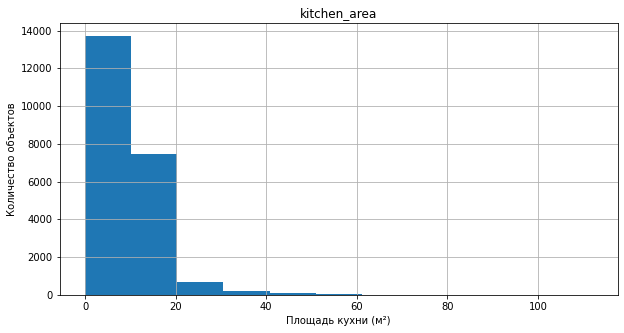

In [98]:
ax = data.hist(column='kitchen_area', bins=11, figsize=(10, 5))
ax[0][0].set(xlabel='Площадь кухни (м²)', ylabel='Количество объектов')

plt.show()

Отсечем слишком большие значения площадей, чтобы увидеть картину четче. Изучим диаграмму размаха, чтобы понять, какие значения выбиваются из общей массы.

In [99]:
data['kitchen_area'].describe()

count    22190.000000
mean        10.442022
std          5.959007
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

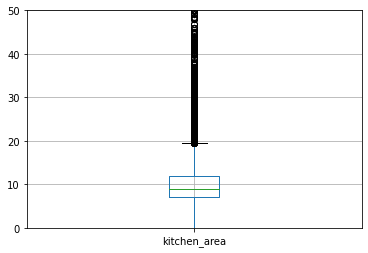

In [100]:
plt.ylim(0, 50)
data.boxplot(column='kitchen_area');

Значения выше 20 отмечаются как выбросы. Проверим количество объектов, которые отмечаются как выбросы.

In [101]:
len(data[data['kitchen_area'] > 20])

1035

Значения, которые имеются у 845 объектов, навряд ли могут быть выбросами, и такие объекты действительно могут быть у квартир с большими площадями. Лучше будет оставить объекты с кухонной площадью до 35 м², т.к. в среднем медианная доля кухонной площади от общей составляет 17,2%. Проверим количество данных, имеющих кухонную площадь от 35 м².

In [102]:
len(data[data['kitchen_area'] > 35])

222

В данном контексте эти данные стоит считать как объекты, которые не относятся к общей массе типовой жилой недвижимости. Предварительно посмотрим, как выглядит гистограмма без этих данных.

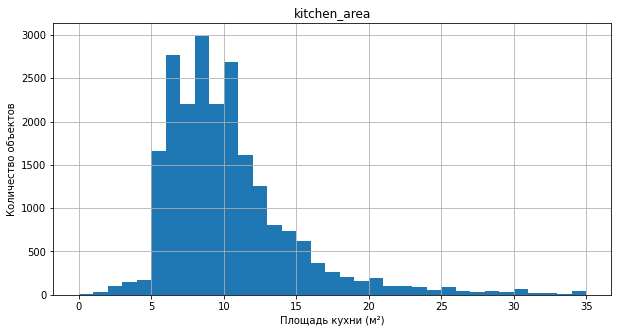

In [103]:
ax = data.hist(column='kitchen_area', bins=35, figsize=(10, 5), range=(0, 35))
ax[0][0].set(xlabel='Площадь кухни (м²)', ylabel='Количество объектов')

plt.show()

Распределение значений выглядит плавным. По графику видно, что на рынке больше всего представлены объекты, имеющие площадь кухни от 5 до 12 м², остальные площади встречаются гораздо реже.

152 от общей доли данных - это менее 1%, поэтому в дальнейшем анализе мы не будем их учитывать.

In [104]:
good_data = good_data[good_data['kitchen_area'] <= 35]

**Вывод**

На рынке больше всего представлены объекты, имеющие площадь кухни от 5 до 12 м², остальные площади встречаются гораздо реже.

Из нового датафрейма удалены выбивающиеся значения по этому столбцу.

##### Анализ столбца `'last_price'`
Построим гистограмму по данным столбца.

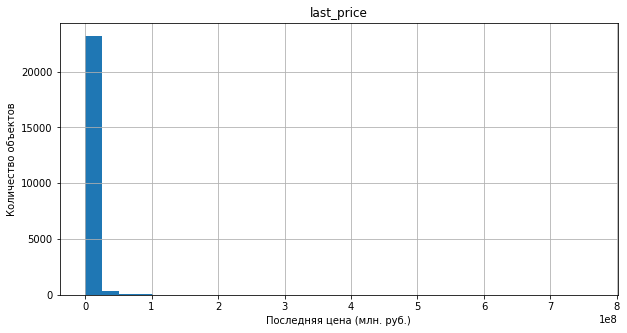

In [105]:
ax = data.hist(column='last_price', bins=30, figsize=(10, 5))
ax[0][0].set(xlabel='Последняя цена (млн. руб.)', ylabel='Количество объектов')

plt.show()

Почти все значения собрались в одном столбце. Исключим слишком высокие цены, чтобы посмотреть на остальные. Изучим диаграмму размаха, чтобы понять, какие значения выбиваются из общей массы.

In [106]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

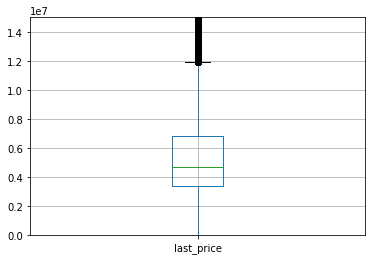

In [107]:
plt.ylim(0, 15000000)
data.boxplot(column='last_price');

Значения выше 12 млн отмечаются как выбросы. Проверим количество объектов, которые отмечаются как выбросы.

In [108]:
len(data[data['last_price'] > 12000000])

1936

Значения, которые имеются у 1936 объектов, навряд ли могут быть выбросами, и такие цены у объектов действительно могут быть. Лучше будет оставить объекты с ценой до 30 млн рублей.Проверим количество данных, имеющих цену от 30 млн.

In [109]:
len(data[data['last_price'] > 30000000])

316

В данном контексте эти данные стоит считать как объекты, которые не относятся к общей массе типовой жилой недвижимости. 

Предварительно посмотрим, как выглядит гистограмма без этих данных.

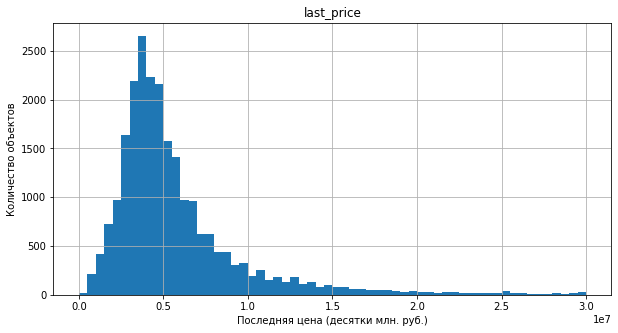

In [110]:
ax = data.hist(column='last_price', bins=60, figsize=(10, 5), range=(0, 30000000))
ax[0][0].set(xlabel='Последняя цена (десятки млн. руб.)', ylabel='Количество объектов')

plt.show()

График выглядит нормальным. Но в столбце разброс цен идет от 12 190 до 630 000 000 рублей. Последнее еще может быть похоже на правду, но с первым значением точно что-то не так. Изучим данные с ценой до 500 000 рублей.

In [111]:
data.loc[data['last_price'] < 100000].sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург,111.83,9.0,2,3,2019,последний


Всего одна строка в результате. Можно сделать вывод, что здесь допущена ошибка. Если учитывать, что квартира расположена в Санкт-Петербурге и имеет площадь 109 м², то, вероятнее всего, цена указана в виде 12190 тыс. руб., то есть 12 190 000 рублей. Исправим значение.

In [112]:
data.loc[data['last_price'] < 100000, 'last_price'] = data.loc[data['last_price'] < 100000, 'last_price'] * 100

Проверяем результат.

In [113]:
data.loc[data['last_price'] < 100000].sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type


Ошибка исправлена. Также взглянем на данные в диапазоне до 600 000 рублей.

In [114]:
data.loc[data['last_price'] < 600000].sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
17456,7,430000.0,30.4,2019-04-22,1,2.65,2.0,16.0,1,False,False,False,6.000000,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Сланцы,14144.74,NaN,0,4,2019,первый
14911,5,430000.0,54.0,2018-06-26,2,2.65,3.0,NaN,3,False,False,False,NaN,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Свирь,7962.96,NaN,1,6,2018,последний
16274,18,440000.0,40.0,2018-07-10,1,2.65,5.0,NaN,1,False,False,False,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Старополье,11000.00,NaN,1,7,2018,первый
16219,14,450000.0,38.5,2018-07-11,2,2.65,2.0,NaN,1,False,False,False,NaN,0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Вахнова Кара,11688.31,NaN,2,7,2018,первый
5698,7,450000.0,42.0,2017-07-31,2,2.65,1.0,23.0,1,False,False,False,5.800000,0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0,Будогощь,10714.29,NaN,0,7,2017,первый
9581,7,450000.0,43.4,2018-08-31,2,2.65,5.0,30.3,3,False,False,False,5.500000,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0,Старополье,10368.66,NaN,4,8,2018,другой
17676,0,450000.0,36.5,2018-02-01,1,2.65,5.0,17.3,4,False,False,False,8.500000,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0,Ям-Тесово,12328.77,NaN,3,2,2018,другой
23484,11,470000.0,44.5,2018-07-02,2,2.65,2.0,28.0,2,False,False,False,7.500000,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.0,Сланцы,10561.80,NaN,0,7,2018,последний
21912,0,470000.0,37.0,2018-02-18,1,2.65,3.0,NaN,3,False,False,False,NaN,0,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Совхозный,12702.70,NaN,6,2,2018,последний
18867,1,470000.0,41.0,2018-02-11,1,2.65,5.0,32.0,3,False,False,False,9.000000,0,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0,Выскатка,11463.41,NaN,6,2,2018,другой


Данные выглядят корректно, т.к. такие цены действительно встречаются у объектов с небольшой площадью, расположенных в сёлах и деревнях в домах до 5 этажей.

Теперь взглянем на данные в диапазоне от 100 000 000 рублей.

In [115]:
data.loc[data['last_price'] > 100000000].sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
21923,10,115490000.0,235.0,2017-04-09,5,4.90,5.0,140.00,5,False,False,False,50.000000,0,Санкт-Петербург,22777.0,1328.0,3.0,652.0,3.0,253.0,351.0,Санкт-Петербург,491446.81,1.0,6,4,2017,последний
1188,20,118000000.0,290.6,2018-06-01,6,3.82,6.0,188.70,3,False,False,False,22.000000,1,Санкт-Петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0,Санкт-Петербург,406056.43,6.0,4,6,2018,другой
20264,17,119000000.0,187.6,2017-07-10,4,6.00,7.0,147.00,7,False,False,False,15.600000,0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0,Санкт-Петербург,634328.36,6.0,0,7,2017,последний
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4.0,162.00,3,False,False,False,30.000000,0,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0,Санкт-Петербург,428571.43,4.0,3,7,2018,другой
16647,15,122000000.0,145.0,2017-04-25,3,3.30,6.0,36.00,2,False,False,False,72.000000,0,Санкт-Петербург,33931.0,7023.0,2.0,478.0,3.0,250.0,335.0,Санкт-Петербург,841379.31,7.0,1,4,2017,другой
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4.0,67.20,2,False,False,False,20.000000,0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0,Санкт-Петербург,995983.94,2.0,3,10,2017,другой
21023,17,124350000.0,248.7,2015-08-27,4,3.40,9.0,131.00,4,False,False,False,23.000000,0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0,Санкт-Петербург,500000.00,2.0,3,8,2015,другой
20349,17,124480000.0,267.7,2016-06-18,4,2.65,8.0,107.03,8,False,False,False,29.860000,0,Санкт-Петербург,27102.0,7442.0,2.0,164.0,2.0,473.0,205.0,Санкт-Петербург,464998.13,7.0,5,6,2016,последний
1928,11,125000000.0,224.5,2017-01-24,4,2.65,4.0,163.50,3,False,False,False,30.000000,1,Санкт-Петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0,Санкт-Петербург,556792.87,2.0,1,1,2017,другой
21955,19,130000000.0,431.0,2017-10-02,7,3.70,8.0,220.00,5,False,False,False,20.000000,5,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0,Санкт-Петербург,301624.13,NaN,0,10,2017,другой


Здесь также всё в порядке. Эти квартиры скорее можно отнести к премиальной, чем к стандартной жилой недвижимости, ошибки в них нет.

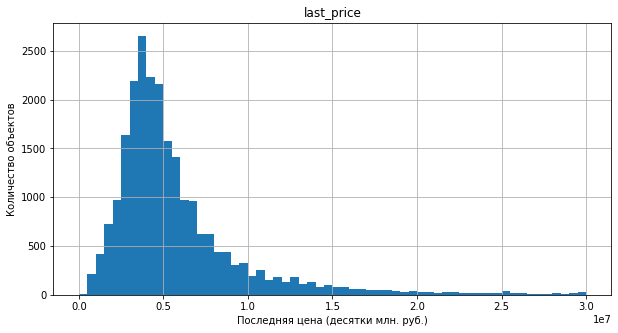

In [116]:
ax = data.hist(column='last_price', bins=60, figsize=(10, 5), range=(0, 30000000))
ax[0][0].set(xlabel='Последняя цена (десятки млн. руб.)', ylabel='Количество объектов')

plt.show()

Распределение значений выглядит плавным. На графике четко виден пик от 3 до 5 млн рублей.

Удалим 316 аномальных значений - это 1% от общих данных.

In [117]:
good_data = good_data[good_data['last_price'] <= 30000000]

**Вывод**

На рынке чаще всего встречаются объекты, имеющие стоимость от 3 до 5 млн рублей., остальные встречаются гораздо реже.

Из нового датафрейма удалены выбивающиеся значения по этому столбцу.

##### Анализ столбца `'rooms'`

В столбце встречаются значения от 0 до 19. Необходимо проверить данные, у которых указано 0 комнат, связано ли это с тем, что они являются студиями. 

In [118]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [119]:
data.loc[data['rooms'] == 0, 'studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

Всего 197 у объектов указано 0 комнат, и действительно большинство отмечены как студии, но не все. Рассмотрим подробнее объекты, которые не отмечены как студии.

In [120]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False)].sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
9412,5,2100000.0,16.00,2017-12-10,0,2.65,6.0,13.0,1,False,False,True,1.235294,0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,Санкт-Петербург,131250.00,2.0,6,12,2017,первый
19477,11,2300000.0,20.00,2017-11-10,0,2.65,10.0,16.0,1,False,False,True,1.647059,0,Санкт-Петербург,29791.0,12652.0,0.0,NaN,1.0,815.0,35.0,Санкт-Петербург,115000.00,13.0,4,11,2017,первый
20054,5,2730000.0,21.00,2017-11-22,0,2.65,9.0,14.0,6,False,False,True,2.882353,0,Санкт-Петербург,17048.0,5936.0,2.0,462.0,0.0,NaN,45.0,Санкт-Петербург,130000.00,6.0,2,11,2017,другой
1574,0,2200000.0,22.00,2017-11-03,0,2.65,18.0,15.0,16,False,False,True,2.882353,1,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0,Кудрово,100000.00,NaN,4,11,2017,другой
17824,10,2300000.0,22.50,2017-09-27,0,2.65,22.0,20.0,7,False,False,True,1.029412,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0,Мурино,102222.22,NaN,2,9,2017,другой
946,5,2200000.0,23.00,2016-09-27,0,2.65,27.0,18.0,7,False,False,True,2.058824,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0,Мурино,95652.17,NaN,1,9,2016,другой
11692,0,2550000.0,23.06,2017-10-24,0,2.80,14.0,18.0,9,False,False,True,2.083529,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,20.0,Кудрово,110581.09,NaN,1,10,2017,другой
1625,7,1980000.0,23.98,2018-02-01,0,2.65,4.0,10.5,3,False,False,True,5.550588,1,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0,Корнево,82568.81,NaN,3,2,2018,другой
22573,8,2250000.0,24.00,2017-09-28,0,2.65,12.0,15.0,3,False,False,True,3.705882,2,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Новоселье,93750.00,NaN,3,9,2017,другой
3019,18,2100000.0,24.00,2017-11-10,0,2.65,10.0,18.0,6,False,False,True,2.470588,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Сертолово,87500.00,NaN,4,11,2017,другой


По площади квартиры подходят под критерии студии, и т.к. у них не указано количество комнат, заменим в этих строках значение в столбце `'studio'` на `True`, кроме последней строки.

In [121]:
data.loc[(data['rooms'] == 0) & (data['total_area'] != 371), 'studio'] = True

Проверяем результат.

In [122]:
data.loc[(data['rooms'] == 0) & (data['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7.0,NaN,6,False,False,True,NaN,0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0,Санкт-Петербург,191374.66,6.0,3,7,2018,другой


Значения исправлены. У последнего объекта довольно большая площадь, вероятнее всего ошибка была допущена в столбце `'rooms'`, поэтому ему необходимо присвоить медианное значение от квартир с подобной площадью.

In [123]:
data.loc[(data['rooms'] == 0) & (data['total_area'] == 371), 'rooms'] = data.loc[(data['total_area'] > 300) & (data['total_area'] < 400), 'rooms'].median()

Проверяем результат.

In [124]:
data.loc[data['total_area'] == 371]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
19392,5,71000000.0,371.0,2018-07-26,6.0,3.57,7.0,NaN,6,False,False,True,NaN,0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0,Санкт-Петербург,191374.66,6.0,3,7,2018,другой


Столбцу присвоено медианное значение 6, что похоже на правду. Теперь проверим остальные квартиры, в которых указано количество комнат, отмечены ли они в качестве студии.

In [125]:
data.loc[data['rooms'] !=0, 'studio'].value_counts()

False    23443
True        11
Name: studio, dtype: int64

11 объектов с комнатами отмечены как студии. Рассмотрим их подробнее.

In [126]:
data.loc[(data['rooms'] >= 1) & (data['studio'] == True)].sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
18732,4,2400000.0,22.00,2016-05-06,1.0,2.65,10.0,15.00,6,False,True,False,2.882353,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Кудрово,109090.91,NaN,4,5,2016,другой
20086,0,1550000.0,22.00,2016-05-11,1.0,2.70,15.0,10.94,14,False,True,False,4.554118,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Никольское,70454.55,NaN,2,5,2016,другой
21702,9,2349000.0,23.40,2016-05-19,1.0,2.70,20.0,16.00,8,False,True,False,3.047059,1,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,34.0,Новое Девяткино,100384.62,NaN,3,5,2016,другой
2389,5,2250000.0,25.41,2016-06-07,1.0,2.65,12.0,17.08,8,False,True,False,3.430000,2,Санкт-Петербург,14125.0,12921.0,2.0,328.0,2.0,485.0,26.0,Санкт-Петербург,88547.82,13.0,1,6,2016,другой
22652,5,2650000.0,26.00,2015-06-24,1.0,2.65,14.0,15.00,11,False,True,False,4.529412,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,373.0,Мурино,101923.08,NaN,2,6,2015,другой
3187,13,3800000.0,27.00,2016-05-17,1.0,2.65,14.0,18.00,8,False,True,False,3.705882,2,Санкт-Петербург,50348.0,16053.0,0.0,NaN,0.0,NaN,45.0,Санкт-Петербург,140740.74,16.0,1,5,2016,другой
11026,1,2800000.0,28.00,2016-05-04,1.0,2.65,26.0,19.00,6,False,True,False,3.705882,2,посёлок Парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,45.0,Парголово,100000.00,20.0,2,5,2016,другой
15142,2,2700000.0,30.00,2016-05-10,1.0,2.65,21.0,26.00,6,False,True,False,1.647059,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Кудрово,90000.00,NaN,1,5,2016,другой
12935,10,2200000.0,31.00,2016-05-15,1.0,2.50,8.0,22.30,5,False,True,False,3.582353,1,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Никольское,70967.74,NaN,6,5,2016,другой
8683,10,3500000.0,32.50,2016-05-05,1.0,3.00,23.0,29.90,11,False,True,False,1.070588,2,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0,Санкт-Петербург,107692.31,15.0,3,5,2016,другой


Все объекты отмечены как однокомнатные и по площади действительно соответствуют размеру студии. Если пользователь в объявлении отметил, что квартира относится к студии, то вероятнее всего это действительно так. Изменим у этих квартир количество комнат на 0.

In [127]:
data.loc[(data['rooms'] == 1) & (data['studio'] == True), 'rooms'] = 0

Проверяем результат.

In [128]:
data.loc[(data['rooms'] == 1) & (data['studio'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type


Теперь данные в порядке. Проверим квартиры, у которых количество комнат больше 10.

In [129]:
data.loc[(data['rooms'] >= 10)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
648,3,17500000.0,183.7,2018-07-01,11.0,3.40,7.0,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,0.0,Санкт-Петербург,95264.02,3.0,6,7,2018,последний
866,5,25000000.0,363.0,2017-12-23,14.0,3.16,5.0,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,Санкт-Петербург,68870.52,8.0,5,12,2017,другой
4149,6,23000000.0,272.6,2018-01-11,10.0,3.14,7.0,145.9,7,False,False,False,18.8,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,0.0,Санкт-Петербург,84372.71,12.0,3,1,2018,последний
5358,20,65000000.0,590.0,2019-02-14,15.0,3.50,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,Санкт-Петербург,110169.49,5.0,3,2,2019,другой
9688,8,33000000.0,194.1,2017-02-07,11.0,3.43,5.0,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0,Санкт-Петербург,170015.46,1.0,1,2,2017,другой
14498,6,32250000.0,374.6,2018-06-09,19.0,2.65,5.0,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,Санкт-Петербург,86091.83,4.0,5,6,2018,другой
18119,4,15500000.0,216.1,2016-07-04,10.0,3.15,5.0,161.4,2,False,False,False,19.8,0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0,Санкт-Петербург,71726.05,5.0,0,7,2016,другой
18848,6,28500000.0,270.0,2015-03-02,16.0,3.00,4.0,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0,Санкт-Петербург,105555.56,4.0,0,3,2015,последний
18891,11,40000000.0,290.0,2016-06-21,10.0,3.50,6.0,189.4,6,False,False,False,30.0,1,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0,Санкт-Петербург,137931.03,5.0,1,6,2016,последний
19540,8,420000000.0,900.0,2017-12-06,12.0,2.80,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,Санкт-Петербург,466666.67,8.0,2,12,2017,последний


Данные выглядят корректно. Объекты не похожи на типичные, но количество комнат соответствуют площади квартиры.

Теперь взглянем на гистограмму.

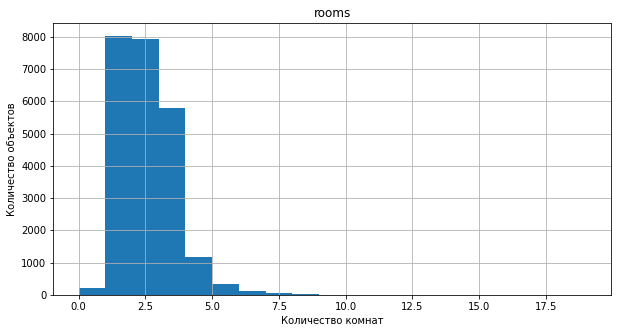

In [130]:
ax = data.hist(column='rooms', bins=19, figsize=(10, 5))
ax[0][0].set(xlabel='Количество комнат', ylabel='Количество объектов')

plt.show()

У графика длинный хвост из больших значений, которых очень мало в таблице.

Изучим диаграмму размаха, чтобы понять, какие значения выбиваются из общей массы.

In [131]:
data['rooms'].describe()

count    23650.000000
mean         2.069894
std          1.079516
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

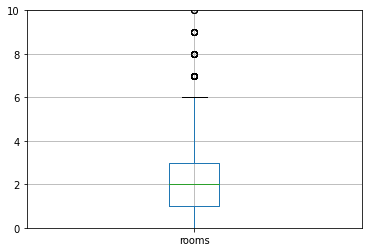

In [132]:
plt.ylim(0, 10)
data.boxplot(column='rooms');

Значения выше 30 отмечаются как выбросы. Проверим количество объектов, которые отмечаются как выбросы.

In [133]:
len(data[data['rooms'] > 6])

90

Таких объектов действительно немного. В данном контексте эти данные стоит считать как объекты, которые не относятся к общей массе типовой жилой недвижимости. 

Посмотрим, как выглядит гистограмма без этих данных.

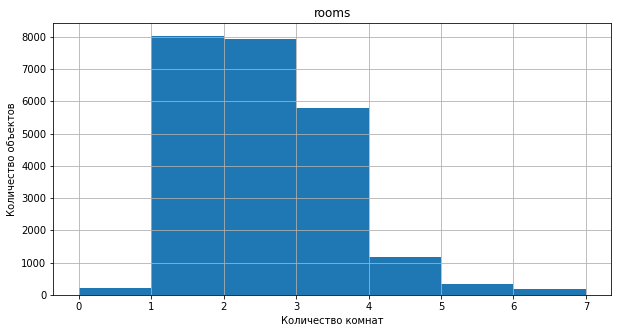

In [134]:
ax = data.hist(column='rooms', bins=7, figsize=(10, 5), range=(0, 7))
ax[0][0].set(xlabel='Количество комнат', ylabel='Количество объектов')

plt.show()

В графике четко видно, что самые распространенные квартиры - это с одной и двумя комнатами. Также встречаются часто трехкомнатные, а вот остальных уже не так много.

Удалим 90 аномальных значений.

In [135]:
good_data = good_data[good_data['rooms'] <= 6]

**Вывод**

На рынке недвижимости самые распространенные квартиры - это с одной и двумя комнатами. Также встречаются часто трехкомнатные, а вот остальных уже не так много.

Из нового датафрейма удалены выбивающиеся значения по этому столбцу.

##### Анализ столбца `'ceiling_height'`
Взглянем на гистограмму по данным столбца.

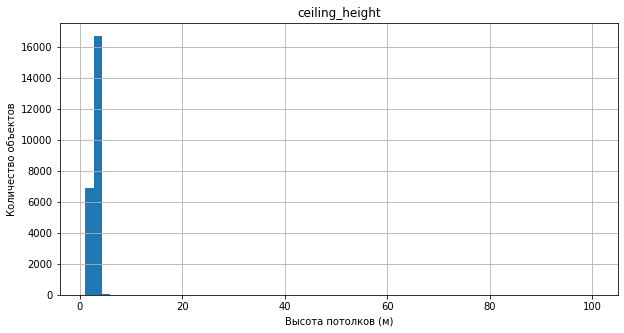

In [136]:
ax = data.hist(column='ceiling_height', bins=60, figsize=(10, 5))
ax[0][0].set(xlabel='Высота потолков (м)', ylabel='Количество объектов')

plt.show()

Все значения собрались в самом начале графика, а длинный хвост из больших значений, которых очень мало в таблице, доходит аж до 100 м. Изучим общую информацию о столбце.

In [137]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Значение высоты потолка варьируется от 1 до 100 м, здесь явно что-то не так. Потолок не может быть ниже 2 м и выше 8.3 м (а это уже соответствует высоте трёхэтажного дома). Изучим данные подробнее.

In [138]:
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] >= 10)].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
22590,16,6000000.0,55.0,2018-10-31,2.0,1.00,12.0,32.4,7,False,False,False,10.000000,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,Санкт-Петербург,109090.91,14.0,2,10,2018,другой
5712,5,1500000.0,42.8,2017-08-14,2.0,1.20,2.0,27.5,1,False,False,False,5.200000,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0,Мга,35046.73,NaN,0,8,2017,первый
16934,5,4100000.0,40.0,2017-10-17,1.0,1.75,37.0,17.4,5,False,False,False,8.340000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,Санкт-Петербург,102500.00,20.0,1,10,2017,другой
22309,20,5300000.0,45.0,2017-09-30,1.0,10.30,16.0,15.5,15,False,False,False,12.147059,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0,Санкт-Петербург,117777.78,12.0,5,9,2017,другой
15061,19,5600000.0,56.4,2018-05-11,2.0,14.00,14.0,32.4,5,False,False,False,9.100000,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0,Санкт-Петербург,99290.78,14.0,4,5,2018,другой
17496,15,6700000.0,92.9,2019-02-19,3.0,20.00,17.0,53.2,14,False,False,False,12.000000,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,0.0,Санкт-Петербург,72120.56,15.0,1,2,2019,другой
20507,12,5950000.0,60.0,2018-02-19,2.0,22.60,14.0,35.0,11,False,False,False,13.000000,1,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0,Санкт-Петербург,99166.67,13.0,0,2,2018,другой
5076,0,3850000.0,30.5,2018-10-03,1.0,24.00,5.0,19.5,1,True,False,False,5.500000,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,Санкт-Петербург,126229.51,8.0,2,10,2018,первый
355,17,3600000.0,55.2,2018-07-12,2.0,25.00,5.0,32.0,2,False,False,False,9.552941,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,Гатчина,65217.39,NaN,3,7,2018,другой
18545,6,3750000.0,43.0,2019-03-18,2.0,25.00,5.0,29.0,3,False,False,False,5.764706,0,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0,Санкт-Петербург,87209.30,8.0,0,3,2019,другой


Значения в промежутке от 20 до 32 м встречаются довольно часто в отличие от других значений, которых всего по одному в списке. Можно предположить, что в этих строках была допущена опечатка и вместо 20 и 32 м должны быть 2 и 3.2 м. Испрвим значения.

In [139]:
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 32), 'ceiling_height'] / 10

Проверяем результат.

In [140]:
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] >= 10)].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
22590,16,6000000.0,55.0,2018-10-31,2.0,1.00,12.0,32.4,7,False,False,False,10.000000,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,Санкт-Петербург,109090.91,14.0,2,10,2018,другой
5712,5,1500000.0,42.8,2017-08-14,2.0,1.20,2.0,27.5,1,False,False,False,5.200000,0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0,Мга,35046.73,NaN,0,8,2017,первый
16934,5,4100000.0,40.0,2017-10-17,1.0,1.75,37.0,17.4,5,False,False,False,8.340000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,Санкт-Петербург,102500.00,20.0,1,10,2017,другой
22309,20,5300000.0,45.0,2017-09-30,1.0,10.30,16.0,15.5,15,False,False,False,12.147059,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0,Санкт-Петербург,117777.78,12.0,5,9,2017,другой
15061,19,5600000.0,56.4,2018-05-11,2.0,14.00,14.0,32.4,5,False,False,False,9.100000,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0,Санкт-Петербург,99290.78,14.0,4,5,2018,другой
22869,0,15000000.0,25.0,2018-07-25,1.0,100.00,5.0,14.0,5,True,False,False,11.000000,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,Санкт-Петербург,600000.00,8.0,2,7,2018,последний


Значения исправлены. Остались лишь аномальные значения. Изучим диаграмму размаха, чтобы понять, какие значения выбиваются из общей массы.

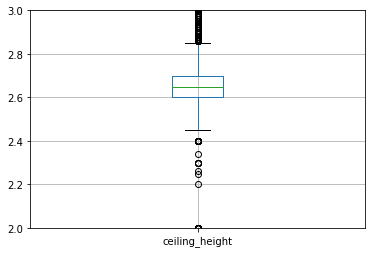

In [141]:
plt.ylim(2, 3)
data.boxplot(column='ceiling_height');

In [142]:
len(data[data['ceiling_height'] > 3])

1505

In [143]:
len(data[data['ceiling_height'] <= 2.4])

47

Аномальными значения отмечены высоты до 2.4 м и свыше 3 м. Квартир с потолком ниже 2.4 м действительно немного, поэтому их можно отбросить, но квартир с потолком свыше 3 м значительное количество, поэтому их нельзя назвать выбросами. Округлим до 4 м.

In [144]:
len(data[data['ceiling_height'] > 4])

53

Посмотрим, как выглядит гистограмма без этих данных.

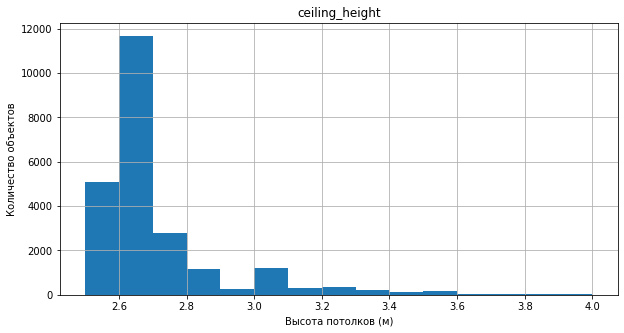

In [145]:
ax = data.hist(column='ceiling_height', bins=15, figsize=(10, 5), range=(2.5, 4))
ax[0][0].set(xlabel='Высота потолков (м)', ylabel='Количество объектов')

plt.show()

Подавляющее большинство квартир имеют высоту потолка от 2.5 до 2.8 м. Очень сильно выделяются значения от 2.6 до 2.7 м, т.к. почти половина пропущенных значений в таблице были заполнены медианой высоты потолков, равной 2.65 м, что искажает график.

Удалим 100 аномальных значений.

In [146]:
good_data = good_data[(good_data['ceiling_height'] <= 4) & (good_data['ceiling_height'] > 2.4)]

**Вывод**

На рынке недвижимости подавляющее большинство квартир имеют высоту потолка от 2.5 до 2.8 м. 

Из нового датафрейма удалены выбивающиеся значения по этому столбцу.

##### Анализ столбца `'floor_type'`
Изучим гистограмму по типу этажа.

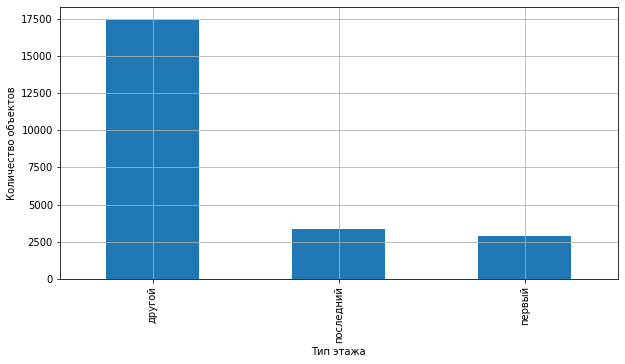

In [147]:
ax = data['floor_type'].value_counts().plot(kind='bar', figsize=(10, 5), grid=True)
ax.set(xlabel='Тип этажа', ylabel='Количество объектов')

plt.show()

График выглядит нормальным.

**Вывод**

Объектов, размещенных на первом этаже, почти столько же, сколько и объектов на последнем этаже. 74% квартир находятся на остальных этажах.

##### Анализ столбца `'floors_total'`
Изучим уникальные значения столбца.

In [148]:
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

В столбце выбиваются значения 52 и 60, т.к. в  Санкт-Петербурге и Ленинградской области нет жилых домов выше 37 этажа. Взглянем на эти объекты.

In [149]:
data.loc[(data['floors_total'] > 50)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
2253,12,3800000.0,45.5,2018-06-28,2.0,2.88,60.0,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,Кронштадт,83516.48,49.0,3,6,2018,другой
16731,9,3978000.0,40.0,2018-09-24,1.0,2.65,52.0,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,Санкт-Петербург,99450.00,13.0,0,9,2018,другой


Лучше всего у объекта из Кронштадта заменить значение на медианное по данному городу, а у объекта из Санкт-Петербурга подставить фактический этаж, на котором расположена квартира, т.к. медиана по этому городу меньше фактического этажа данного объекта.

In [150]:
data.loc[(data['floors_total'] > 50) & (data['clear_locality_name'] == 'Кронштадт'), 'floors_total'] = data.loc[data['clear_locality_name'] == 'Кронштадт', 'floors_total'].median()
data.loc[(data['floors_total'] > 50) & (data['clear_locality_name'] == 'Санкт-Петербург'), 'floors_total'] = data['floor']

Проверяем результат.

In [151]:
data.loc[(data['floors_total'] > 50)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type


Аномальные значения исправлены, теперь данные корретны.

Построим гистограмму по данным столбца.

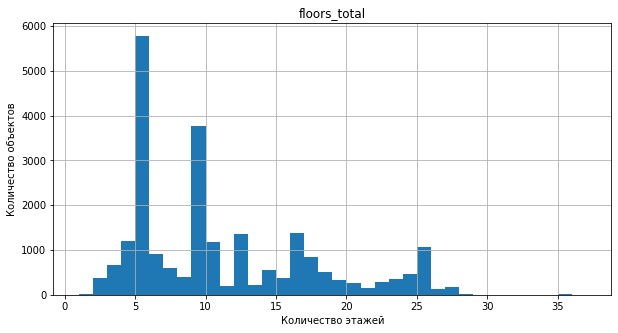

In [152]:
ax = data.hist(column='floors_total', bins=36, figsize=(10, 5))
ax[0][0].set(xlabel='Количество этажей', ylabel='Количество объектов')

plt.show()

На графике очень сильно выделяются значения в 5 и 9 этажей, когда как остальных значительно меньше и разница между ними более плавная. Это объясняется тем, что в наше время осталось всё еще очень много типовых жилых домов в 5 и 9 этажей, построенных в советское время (т.н. "хрущёвки" и "брежневки"). 

На втором месте по распространенности находятся дома с 4, 10, 12, 16 и 25 этажами.

Изучим диаграмму размаха, чтобы понять, какие значения выбиваются из общей массы.

In [153]:
data['floors_total'].describe()

count    23565.000000
mean        10.672098
std          6.581763
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

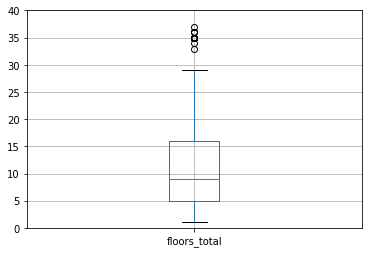

In [154]:
plt.ylim(0, 40)
data.boxplot(column='floors_total');

Значения выше 30 отмечаются как выбросы. Проверим количество объектов, которые отмечаются как выбросы.

In [155]:
len(data[data['floors_total'] > 30])

30

In [156]:
data[data['floors_total'] > 30]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
397,15,5990000.0,54.0,2018-03-22,2.0,2.65,36.0,21.4,28,False,False,False,18.700000,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,Санкт-Петербург,110925.93,20.0,3,3,2018,другой
871,14,7777777.0,75.0,2017-11-16,2.0,2.65,35.0,40.5,23,False,False,False,11.700000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0,Санкт-Петербург,103703.69,20.0,3,11,2017,другой
1060,10,5200000.0,50.0,2015-11-06,2.0,2.65,35.0,39.0,15,False,False,False,11.000000,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0,Санкт-Петербург,104000.00,20.0,4,11,2015,другой
1697,11,3550000.0,28.0,2018-02-08,1.0,2.65,34.0,18.0,23,False,False,False,4.117647,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0,Санкт-Петербург,126785.71,20.0,3,2,2018,другой
1917,13,10150000.0,74.0,2017-11-17,2.0,2.80,35.0,34.4,30,False,False,False,13.000000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,0.0,Санкт-Петербург,137162.16,20.0,4,11,2017,другой
2966,9,4300000.0,37.0,2017-08-08,1.0,2.65,35.0,14.0,15,False,False,False,10.400000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0,Санкт-Петербург,116216.22,20.0,1,8,2017,другой
4855,12,5500000.0,50.0,2017-06-22,1.0,2.80,35.0,22.0,4,False,False,False,13.000000,0,Санкт-Петербург,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0,Санкт-Петербург,110000.00,20.0,3,6,2017,другой
5749,20,3590000.0,25.0,2017-08-30,0.0,2.80,35.0,NaN,26,False,True,True,NaN,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0,Санкт-Петербург,143600.00,20.0,2,8,2017,другой
5807,17,8150000.0,80.0,2019-01-09,2.0,2.70,36.0,41.0,13,False,False,False,12.000000,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,Санкт-Петербург,101875.00,20.0,2,1,2019,другой
5808,12,4590000.0,43.0,2018-10-19,1.0,2.65,35.0,14.0,11,False,False,False,15.000000,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,82.0,Санкт-Петербург,106744.19,20.0,4,10,2018,другой


Таких объектов действительно немного. Но эти данные нельзя удалять, т.к. они по остальным параметрам их можно отнести к стандартной жилой недвижимости, а этажность дома, в котором находится объект - второстепенный параметр.

**Вывод**

Большинство объектов размещены в домах высотой в 5 и 9 этажей. На втором месте по распространенности находятся дома с 4, 10, 12, 16 и 25 этажами.

##### Анализ столбца `'city_centers_nearest'`
Взглянем на гистограмму по данным столбца.

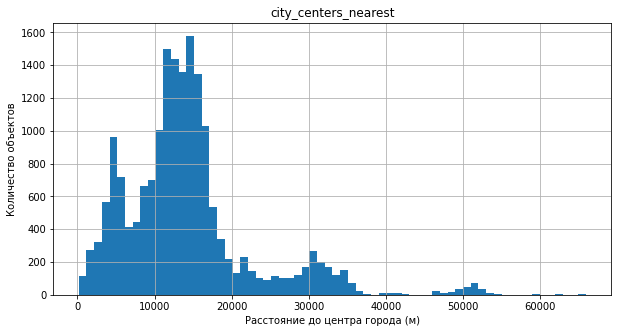

In [157]:
ax = data.hist(column='city_centers_nearest', bins=66, figsize=(10, 5))
ax[0][0].set(xlabel='Расстояние до центра города (м)', ylabel='Количество объектов')

plt.show()

Значения распределены неравномерно, выделяются два пика. По графику видно, что большинство объектов расположены в пределах 11-15 км от центра. Также часто встречаются квартиры на расстоянии 5, 10, 16 км. Также на графике виден длинный хвост из больших значений, что говорит о том, что встречаются объекты, находящиеся в пригородах.

Изучим диаграмму размаха, чтобы понять, какие значения выбиваются из общей массы.

In [158]:
data['city_centers_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

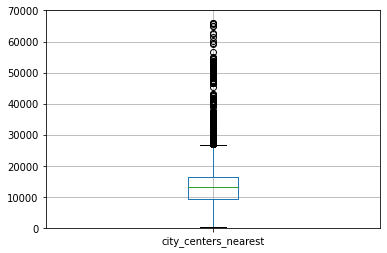

In [159]:
plt.ylim(0, 70000)
data.boxplot(column='city_centers_nearest');

Значения выше 30 км отмечаются как выбросы. Проверим количество таких объектов.

In [160]:
len(data[data['city_centers_nearest'] > 30000])

1333

In [161]:
data[data['city_centers_nearest'] > 30000].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
11,9,3300000.0,44.0,2018-08-27,2.0,2.65,5.0,31.0,4,False,False,False,6.0,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,Ломоносов,75000.00,52.0,0,8,2018,другой
13,20,3550000.0,42.8,2017-07-01,2.0,2.56,5.0,27.0,5,False,False,False,5.2,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,Петергоф,82943.93,33.0,5,7,2017,последний
14,1,4400000.0,36.0,2016-06-23,1.0,2.65,6.0,17.0,1,False,False,False,8.0,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,Пушкин,122222.22,31.0,3,6,2016,первый
28,8,4170000.0,44.0,2017-12-13,1.0,2.90,6.0,20.8,1,False,False,False,11.7,1,Пушкин,18557.0,30710.0,0.0,NaN,1.0,118.0,74.0,Пушкин,94772.73,31.0,2,12,2017,первый
33,8,4800000.0,73.0,2018-10-15,4.0,2.65,9.0,51.6,5,False,False,False,6.5,0,Колпино,26535.0,32321.0,0.0,NaN,0.0,NaN,92.0,Колпино,65753.42,32.0,0,10,2018,другой
42,13,22000000.0,161.8,2015-07-08,4.0,2.80,4.0,80.9,2,False,False,False,17.6,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,Петергоф,135970.33,31.0,2,7,2015,другой
50,1,4500000.0,48.2,2017-11-13,1.0,2.70,5.0,25.4,4,False,False,False,9.0,1,Пушкин,19841.0,30183.0,1.0,531.0,3.0,330.0,152.0,Пушкин,93361.00,30.0,0,11,2017,другой
67,6,2550000.0,31.0,2018-08-28,1.0,2.50,5.0,15.4,4,False,False,False,7.2,0,Ломоносов,47675.0,51100.0,0.0,NaN,2.0,490.0,39.0,Ломоносов,82258.06,51.0,1,8,2018,другой
72,10,4500000.0,55.0,2018-12-09,2.0,2.70,3.0,35.5,2,False,False,False,7.5,1,Кронштадт,68258.0,49984.0,3.0,167.0,3.0,118.0,141.0,Кронштадт,81818.18,50.0,6,12,2018,другой
74,3,2350000.0,34.0,2018-06-14,1.0,2.50,9.0,19.0,8,False,False,False,7.1,0,Колпино,26765.0,32551.0,1.0,445.0,1.0,996.0,121.0,Колпино,69117.65,33.0,3,6,2018,другой


Таких объектов достаточно много, поэтому они не могут быть выбросами. Эти данные также не стоит удалять, т.к. по остальным параметрам их можно отнести к стандартной жилой недвижимости, а удаленность объекта от центра - второстепенный параметр.

**Вывод**

Большинство объектов расположены в пределах 11-15 км от центра города. Также часто встречаются квартиры на расстоянии 5, 10, 16 км.

##### Анализ столбца `'parks_nearest'`
Взглянем на гистограмму по данным столбца.

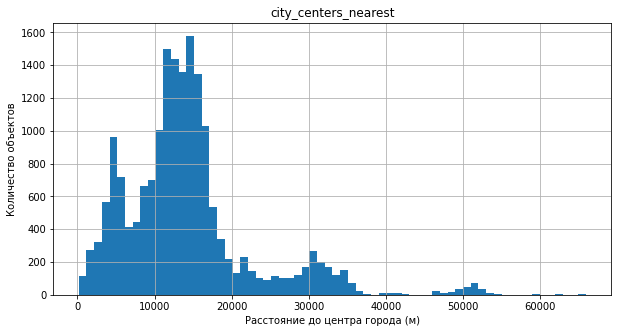

In [162]:
ax = data.hist(column='city_centers_nearest', bins=66, figsize=(10, 5))
ax[0][0].set(xlabel='Расстояние до центра города (м)', ylabel='Количество объектов')

plt.show()

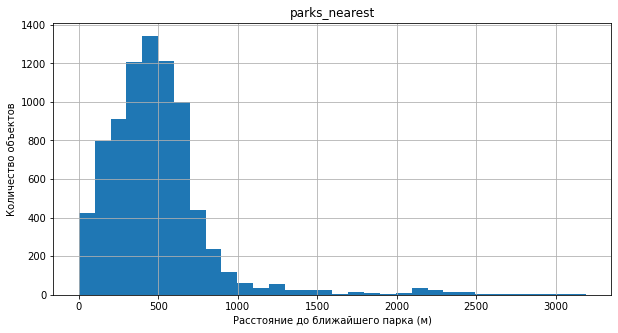

In [163]:
ax = data.hist(column='parks_nearest', bins=32, figsize=(10, 5))
ax[0][0].set(xlabel='Расстояние до ближайшего парка (м)', ylabel='Количество объектов')

plt.show()

График выглядит нормальным. Ярко выражен пик расстояния в 300-500 м. Также присутствует много объектов, находящихся в 100, 200 и 600 м от парков. Также на графике виден длинный хвост из больших значений, что говорит о том, что встречаются объекты, которые удалены от парков на километр и более.

Изучим диаграмму размаха, чтобы понять, какие значения выбиваются из общей массы.

In [164]:
data['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

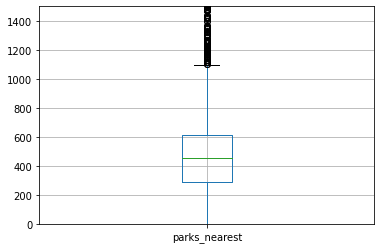

In [165]:
plt.ylim(0, 1500)
data.boxplot(column='parks_nearest');

Значения выше 1.1 км отмечаются как выбросы. Проверим количество таких объектов.

In [166]:
len(data[data['parks_nearest'] > 1100])

314

In [167]:
data[data['parks_nearest'] > 1100].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,clear_locality_name,one_sq_m_price,city_centers_km,exposition_weekday,exposition_month,exposition_year,floor_type
195,8,5300000.0,60.00,2016-05-19,3.0,2.65,9.0,NaN,4,False,False,False,NaN,0,Санкт-Петербург,52072.0,17061.0,1.0,1133.0,3.0,239.0,372.0,Санкт-Петербург,88333.33,17.0,3,5,2016,другой
196,7,8715960.0,57.00,2017-06-29,1.0,2.65,5.0,20.00,5,False,False,False,16.00,0,Санкт-Петербург,17462.0,16465.0,1.0,1205.0,2.0,97.0,119.0,Санкт-Петербург,152911.58,16.0,3,6,2017,последний
323,6,9591727.0,72.00,2017-06-29,2.0,2.80,10.0,34.00,9,False,False,False,17.00,0,Санкт-Петербург,23756.0,5384.0,1.0,2295.0,1.0,534.0,118.0,Санкт-Петербург,133218.43,5.0,3,6,2017,другой
371,11,7300000.0,65.00,2018-09-12,2.0,2.65,12.0,30.04,2,False,False,False,10.20,5,Санкт-Петербург,18621.0,17623.0,1.0,1510.0,2.0,372.0,92.0,Санкт-Петербург,112307.69,18.0,2,9,2018,другой
438,6,7410000.0,70.00,2017-06-29,2.0,2.65,12.0,NaN,5,False,False,False,NaN,0,Санкт-Петербург,23756.0,5384.0,1.0,2295.0,1.0,534.0,229.0,Санкт-Петербург,105857.14,5.0,3,6,2017,другой
512,8,6260000.0,43.30,2014-12-09,1.0,2.65,8.0,NaN,5,False,False,False,NaN,0,Санкт-Петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,1155.0,Санкт-Петербург,144572.75,11.0,1,12,2014,другой
538,2,8600000.0,91.00,2018-02-01,2.0,2.65,4.0,NaN,1,False,False,False,NaN,0,Колпино,26757.0,32543.0,1.0,1443.0,3.0,195.0,260.0,Колпино,94505.49,33.0,3,2,2018,первый
680,14,7200000.0,43.00,2017-10-31,1.0,2.65,8.0,9.00,2,False,False,False,23.00,0,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0,Санкт-Петербург,167441.86,5.0,1,10,2017,другой
684,5,9200000.0,82.93,2014-12-09,2.0,2.65,12.0,41.92,6,False,False,False,16.74,2,Санкт-Петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,1141.0,Санкт-Петербург,110936.93,11.0,1,12,2014,другой
748,13,14350000.0,74.00,2017-11-28,2.0,3.13,5.0,30.00,3,False,False,False,25.00,0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128.0,Санкт-Петербург,193918.92,27.0,1,11,2017,другой


Таких объектов достаточно много, поэтому они не могут быть выбросами. Эти данные также не стоит удалять, т.к. по остальным параметрам их можно отнести к стандартной жилой недвижимости, а удаленность объекта от парков - второстепенный параметр.

**Вывод**

Большинство объектов находятся в 300-500 м от парков. Также присутствует много объектов, находящихся на расстоянии в 100, 200 и 600 м.

##### Общий вывод

In [168]:
data.shape[0] - good_data.shape[0]

2541

Из нового датафрейма было удалено 705 строк, значения которых выбивались из общей массы, что составляет всего 3% от всех данных.

Большинство квартир имеют общую площадь от 30 до 80 м² с жилой площадью 14-34 м² и площадью кухни от 5-12 м².

Стоимость большинства квартир варьируется от 3 до 5 млн рублей. 

Чаще всего встречаются объекты с 1, 2 и 3 комнатами.

2.5 до 2.8 м - самая распространенная высота потолков квартир.

Большинство объектов размещены в домах высотой в 5 и 9 этажей. На втором месте по распространенности находятся дома с 4, 10, 12, 16 и 25 этажами. Объектов, размещенных на первом этаже, почти столько же, сколько и объектов на последнем этаже. 74% квартир находятся на остальных этажах.

Большинство объектов расположены в пределах 10-16 км от центра города и в 100-600 м от парков.

#### Анализ скорости продажи квартир
Изучим, как быстро продавались квартиры. 
Взглянем на гистограмму по данным столбца `'days_exposition'`.

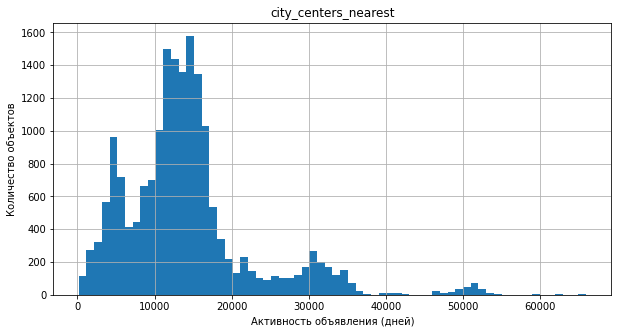

In [169]:
ax = data.hist(column='city_centers_nearest', bins=66, figsize=(10, 5))
ax[0][0].set(xlabel='Активность объявления (дней)', ylabel='Количество объектов')

plt.show()

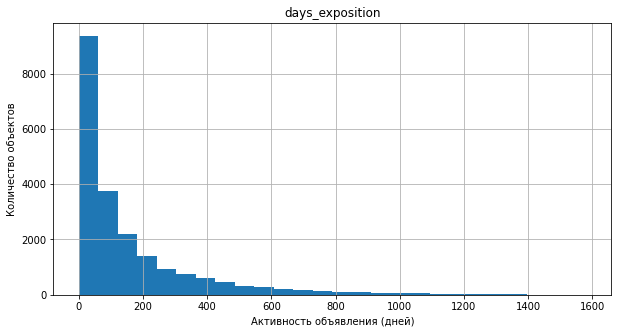

In [170]:
ax = good_data.hist(column='days_exposition', bins=26, figsize=(10, 5))
ax[0][0].set(xlabel='Активность объявления (дней)', ylabel='Количество объектов')

plt.show()

Пока по такому общему графику можно предварительно увидеть, что треть объявлений была закрыта в первые 2 месяца после публикации, а также есть длинный хвост из редких и больших значений.

Изучим общие характеристики данных столбца.

In [171]:
good_data['days_exposition'].describe()

count    21109.000000
mean       157.799706
std        212.216946
min          0.000000
25%         22.000000
50%         77.000000
75%        202.000000
max       1580.000000
Name: days_exposition, dtype: float64

В расчетах нулевые значения не учитываются.

Самый минимальный срок, который потребовался, чтобы закрыть объявление - 1 день. Максимальный - 1580 дней, что составляет 4 года и 4 месяца, это необычайно долго!

Медиана находится на значении 94 дней (около 3 месяцев), но из-за редких и больших значений среднее равно 178 дням (около 6 месяцев), что почти в 2 раза больше медианы.

Изучим диаграмму размаха, чтобы определить необычайно долгие продажи.

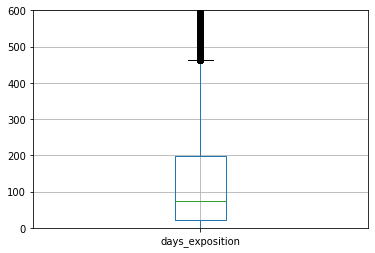

In [172]:
plt.ylim(0, 600)
data.boxplot(column='days_exposition');

Значения более 510 дней указываются как аномальные. Объекты, которые были размещены более полутора лет можно счиать необычно долгими.

Теперь рассмотрим подробнее на графике промежуток первых 365 дней.

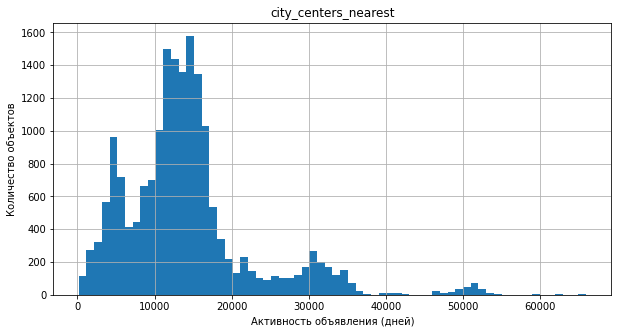

In [173]:
ax = data.hist(column='city_centers_nearest', bins=66, figsize=(10, 5))
ax[0][0].set(xlabel='Активность объявления (дней)', ylabel='Количество объектов')

plt.show()

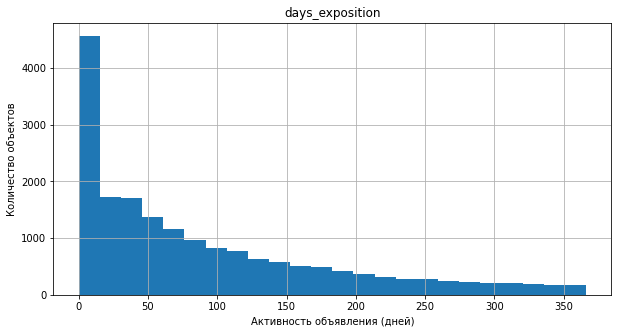

In [174]:
ax = good_data.hist(column='days_exposition', bins=24, figsize=(10, 5),range=(0,366))
ax[0][0].set(xlabel='Активность объявления (дней)', ylabel='Количество объектов')

plt.show()

Объекты, которые были проданы в течение 15 дней с момента публикации можно назвать очень быстрыми.

In [175]:
(good_data['days_exposition'] <= 15).sum()

4564

Таких обявлений 1859, что составляет 9% от общей массы данных.

Высчитаем долю проданных объектов по месяцам при помощи функции `expositions_ratio`.

In [176]:
def expositions_ratio(days):
    result = (good_data['days_exposition'] < days).sum() / good_data['days_exposition'].count()
    return result

In [177]:
month = 1
print('Доля закрытых объявлений:')
while month <= 12:
    print(f'- за {month} мес.: {expositions_ratio(30.5 * month):.0%}')
    month += 1

Доля закрытых объявлений:
- за 1 мес.: 30%
- за 2 мес.: 44%
- за 3 мес.: 54%
- за 4 мес.: 62%
- за 5 мес.: 68%
- за 6 мес.: 73%
- за 7 мес.: 76%
- за 8 мес.: 79%
- за 9 мес.: 82%
- за 10 мес.: 84%
- за 11 мес.: 85%
- за 12 мес.: 87%


В течение 3 месяцев уже была продана 49% объектов, а 86% - в течение года, и всего 14% потребовалось больше года, чтобы закрыть объявление.

**Вывод**

В среднем большинству объектов требуется 3-6 месяцев для продажи.
Продажи, которые были совершены за полмесяца можно считать необычно быстрыми.
Объекты, которые были размещены более полутора лет можно считать необычно долгими.

#### Анализ факторов, влияющих на общую стоимость объекта

Выясним, какие факторы больше всего влияют на общую стоимость объекта. Построим графики, которые покажут зависимость цены `'last_price'` от указанных ниже параметров:
  - общей площади `'total_area'`;
  - жилой площади `'living_area'`;
  - площади кухни `'kitchen_area'`;
  - количество комнат `'rooms'`;
  - типа этажа, на котором расположена квартира `'floor_type'`;
  - дня недели размещения `'exposition_weekday'`;
  - месяца размещения `'exposition_month'`;
  - года размещения `'exposition_year'`.

##### Влияние общей площади на стоимость объекта


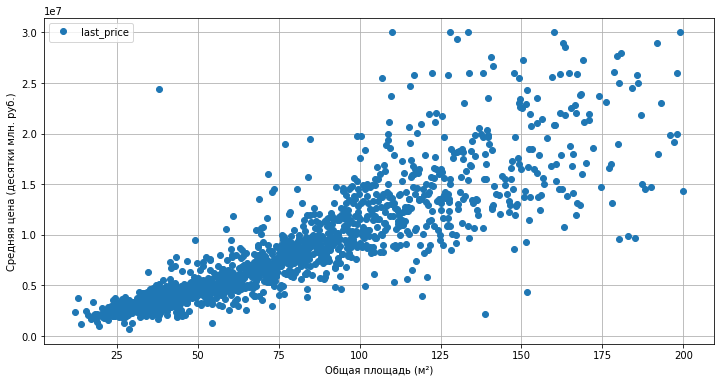

In [178]:
ax = good_data.pivot_table(index='total_area', values='last_price').plot(style='o', grid=True, figsize=(12, 6))
ax.set(xlabel='Общая площадь (м²)', ylabel='Средняя цена (десятки млн. руб.)')

plt.show()

In [179]:
good_data['last_price'].corr(good_data['total_area'])

0.776877906768842

Зависимость цены объекта от его общей площади четко заметна, но у объектов площадью свыше 125 м² эта зависимость становится слабее.

**Вывод**

Корреляция в 0.77 говорит о заметной связи. Влияние общей площади на общую стоимость объекта достаточно сильная до 125 м², далее она уже не так явна.

##### Влияние жилой площади на стоимость объекта

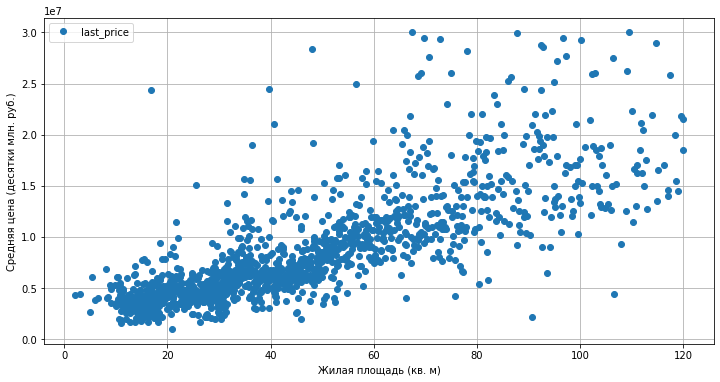

In [180]:
ax = good_data.pivot_table(index='living_area', values='last_price').plot(style='o', grid=True, figsize=(12, 6))
ax.set(xlabel='Жилая площадь (кв. м)', ylabel='Средняя цена (десятки млн. руб.)')

plt.show()

In [181]:
good_data['last_price'].corr(good_data['living_area'])

0.6687708271400439

Зависимость цены объекта от его жилой площади заметна, но она слабее зависимости от общей площади. у объектов с жилой площадью свыше 70 м² эта зависимость становится еще менее очевидной.

**Вывод**

Корреляция в 0.67 говорит о наличии связи, однако не слишком сильной. Влияние жилой площади на общую стоимость объекта прослеживается до 70 м², далее она уже не так явна.

##### Влияние площади кухни на стоимость объекта

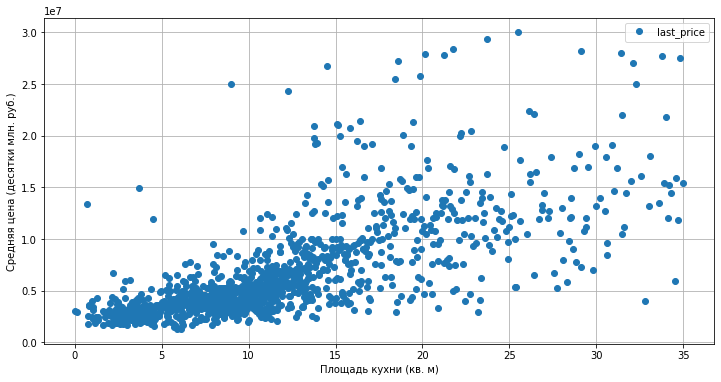

In [182]:
ax = good_data.pivot_table(index='kitchen_area', values='last_price').plot(style='o', grid=True, figsize=(12, 6))
ax.set(xlabel='Площадь кухни (кв. м)', ylabel='Средняя цена (десятки млн. руб.)')

plt.show()

In [183]:
good_data['last_price'].corr(good_data['kitchen_area'])

0.5841589576790757

Зависимость цены объекта от его площади кухни заметна, но она слабее зависимости от общей площади. у объектов с площадью кухни свыше 15 м² эта зависимость становится еще менее очевидной.

**Вывод**

Корреляция в 0.60 говорит о наличии связи, однако не слишком сильной. Влияние площади кухни на общую стоимость объекта прослеживается до 15 м², далее она уже незаметна.

##### Влияние количества комнат на стоимость объекта

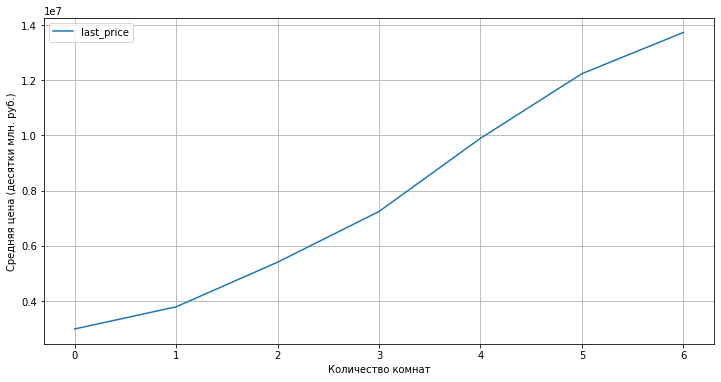

In [184]:
ax = good_data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 6))
ax.set(xlabel='Количество комнат', ylabel='Средняя цена (десятки млн. руб.)')

plt.show()

Проверим количество объявлений по каждому значению столбца `'rooms'`.

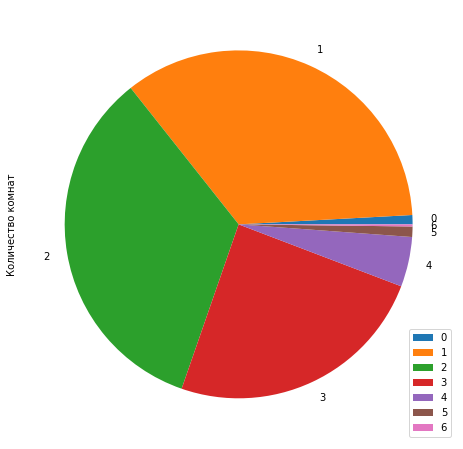

In [185]:
good_data.pivot_table(index='rooms', values='last_price', aggfunc='count').plot(kind='pie', y='last_price', ylabel='Количество комнат', figsize=(8,8));

In [186]:
good_data['last_price'].corr(good_data['rooms'])

0.4931191641966463

Заметна зависимость цены объекта от его количества комнат, но не слишком сильной. у объектов с жилой площадью свыше 70 м² эта зависимость становится еще менее очевидной.

**Вывод**

Корреляция в 0.48 говорит о наличии связи, однако не слишком сильной. Увеличение количества комнат сопровождается прибавкой в цене, но так бывает не всегда. Четко заметен рост цены с увеличением комнат от 0 до 3, но данные с 4 и более комнатами нефозможно оценить объективно, так как данных очень мало.

##### Влияние типа этажа на стоимость объекта

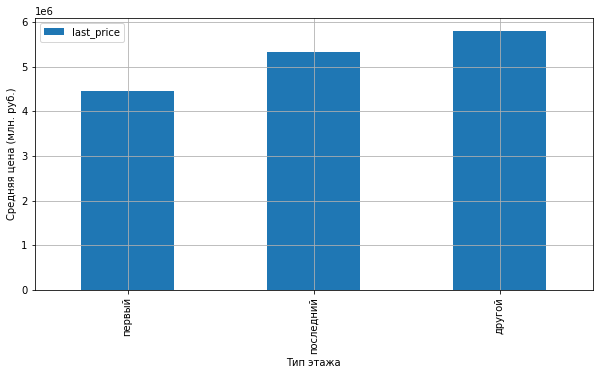

In [187]:
ax = good_data.pivot_table(index='floor_type', values='last_price').sort_values(by='last_price').plot(kind='bar', figsize=(10, 5), grid=True)
ax.set(xlabel='Тип этажа', ylabel='Средняя цена (млн. руб.)')

plt.show()

Проверим количество объявлений по каждому значению столбца `'floor_type'`.

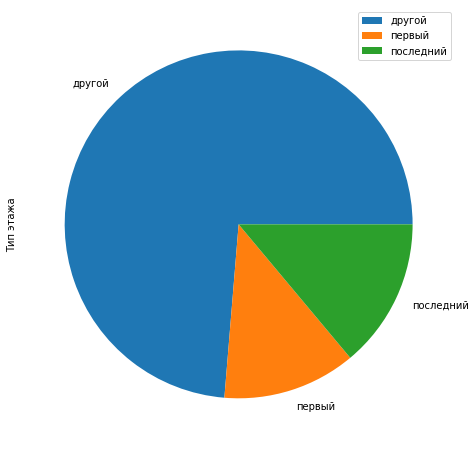

In [188]:
good_data.pivot_table(index='floor_type', values='last_price', aggfunc='count').plot(kind='pie', y='last_price', ylabel='Тип этажа', figsize=(8,8));

Присутствует зависимость общей цены объекта с типом этажа. Разница между средними ценами в зависимости от типа этажа может достигать почти 1.4 млн рублей.

Объектов, размещенных на первом этаже, почти столько же, сколько и объектов на последнем этаже. Но на первом этаже квартиры ценятся меньше всего, когда как на последних этажах средняя стоимость выше более, чем на 800 тысяч.

74% объектов находятся на остальных этажах и имеют самую высокую среднюю общую стоимость, т.к. этих объявлений в 3 раза больше, чем объектов с типом этажей "первый" и "последний" вместе взятых.

**Вывод**

Связь общей цены объекта с типом этажа имеется, однако не слишком сильна. С увеличением этажа расположения квартиры растет средняя стоимость объекта, но так бывает не всегда. 

##### Влияние дня недели размещения объявления на стоимость объекта

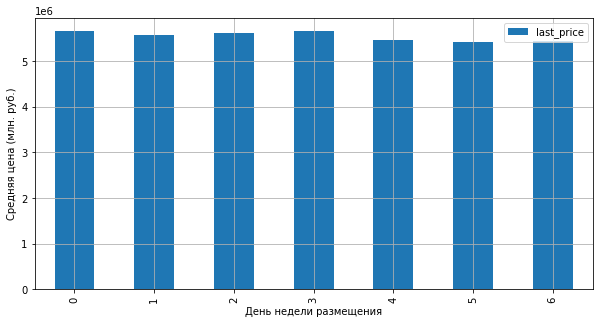

In [189]:
ax = good_data.pivot_table(index='exposition_weekday', values='last_price').plot(kind='bar', figsize=(10, 5), grid=True)
ax.set(xlabel='День недели размещения', ylabel='Средняя цена (млн. руб.)')

plt.show()

Проверим количество объявлений по каждому значению столбца `'exposition_weekday'`.

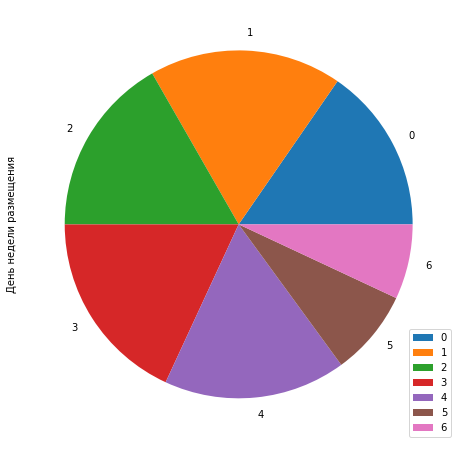

In [190]:
good_data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='count').plot(kind='pie', y='last_price', ylabel='День недели размещения', figsize=(8,8));

Прямой связи общей цены объекта с днем недели размещения обявления нет.

Но можно заметить, что в выходные объявления опубликовывают в 2 раза реже, чем в любой другой будний день.

**Вывод**

Прямой связи общей цены объекта с днем недели размещения обявления нет, разница в средней цене несущественная.

##### Влияние месяца размещения объявления на стоимость объекта

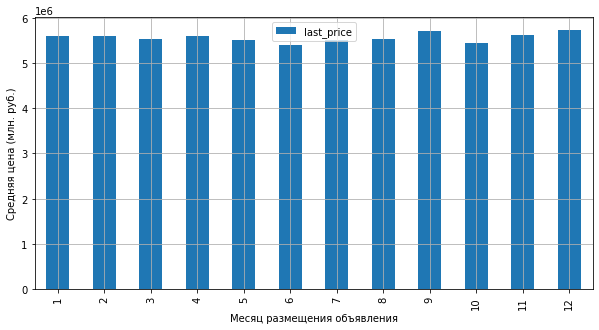

In [191]:
ax = good_data.pivot_table(index='exposition_month', values='last_price').plot(kind='bar', figsize=(10, 5), grid=True)
ax.set(xlabel='Месяц размещения объявления', ylabel='Средняя цена (млн. руб.)')

plt.show()

Проверим количество объявлений по каждому значению столбца `'exposition_month'`.

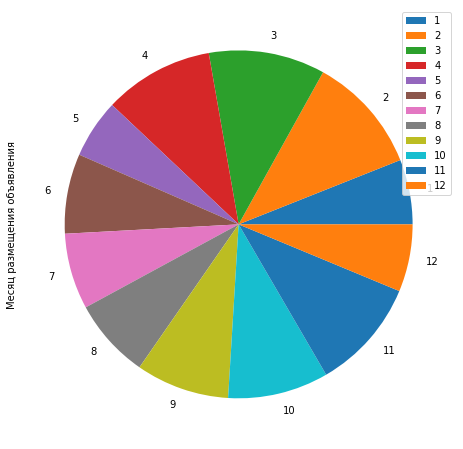

In [192]:
good_data.pivot_table(index='exposition_month', values='last_price', aggfunc='count').plot(kind='pie', y='last_price', ylabel='Месяц размещения объявления', figsize=(8,8));

Прямой связи общей цены объекта с месяцем размещения обявления нет.

Публикация объявлений распределена по месяцам относительно равномерно, меньше всего публикаций было в мае, больше всего - в феврале.

**Вывод**

Прямой связи общей цены объекта с месяцем размещения обявления нет, разница в средней цене несущественная.

##### Влияние года размещения объявления на стоимость объекта

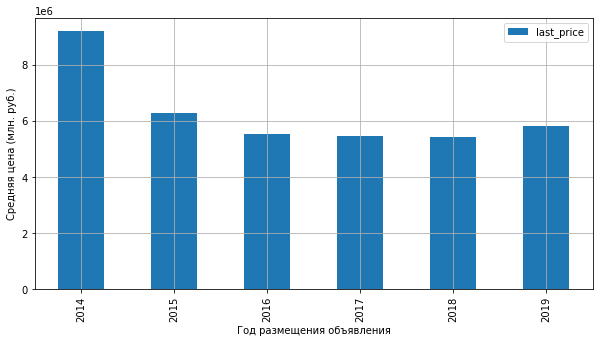

In [193]:
ax = good_data.pivot_table(index='exposition_year', values='last_price').plot(kind='bar', figsize=(10, 5), grid=True)
ax.set(xlabel='Год размещения объявления', ylabel='Средняя цена (млн. руб.)')

plt.show()

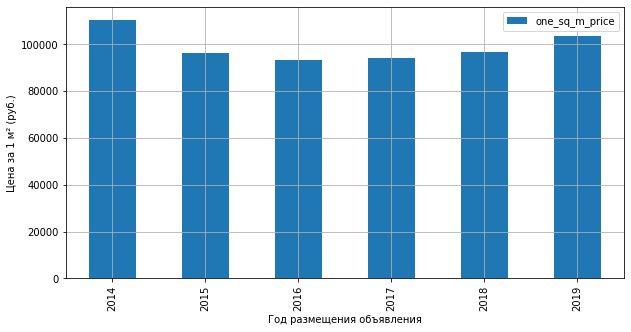

In [194]:
ax = good_data.pivot_table(index='exposition_year', values='one_sq_m_price').plot(kind='bar', figsize=(10, 5), grid=True)
ax.set(xlabel='Год размещения объявления', ylabel='Цена за 1 м² (руб.)')

plt.show()

Проверим количество объявлений по каждому значению столбца `'exposition_year'`.

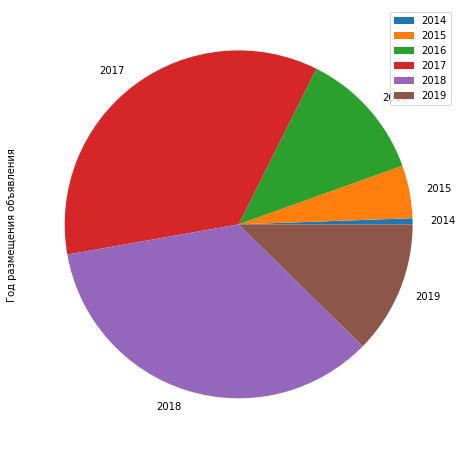

In [195]:
good_data.pivot_table(index='exposition_year', values='last_price', aggfunc='count').plot(kind='pie', y='last_price', ylabel='Год размещения объявления', figsize=(8,8));

In [196]:
good_data['first_day_exposition'].describe()

/tmp/ipykernel_413/1552004539.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  good_data['first_day_exposition'].describe()


count                   21109
unique                   1479
top       2018-02-01 00:00:00
freq                      324
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Прямой связи общей цены объекта с годом размещения обявления нет.

Данные за 2014 год начинаются с 27 ноября, а за 2019 год заканчивается 3 мая, не было предоставлено полных данных за эти годы.

Также данных за 2014, 2015, 2016 и 2019 гораздо меньше, чем 2017 и 2018 годах, что не позволяет объективно сравнивать данные, но из этого можно сделать вывод, что с 2014 и до 2018 года популярность сервиса неуклонно росла.

**Вывод**

Прямой связи общей цены объекта с годом размещения обявления нет. Данных за 2014, 2015, 2016 и 2019 годы недостаточно для объективной оценки влияния года размещения объявления на общую цену объекта.

##### Общий вывод

Наибольшее влияние на общую стоимость объекта имеет общая площадь квартиры. Также заметно влияние, но более слабое со стороны жилой и кухонной площади объекта, хотя эти данные тесно связаны с общей площадью. Чем больше площадь - тем выше стоимость, но при достижении определенного значения эта связь теряется.

Количество комнат и тип этажа имеют некоторую связь с общей стоимостью квартиры, однако она не слишком сильная. С увеличением количества комнат и этажа стоимость также становится больше, но не всегда.

Не выявлено никакой зависимости цены объекта от дня недели, месяца и года размещения объявления на сервисе.

#### Анализ средней цены одного квадратного метра квартиры в населённых пунктах
Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, построив сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.

In [197]:
locality_sq_m_price_pivot = (
    good_data
    .pivot_table(index='clear_locality_name', values = 'one_sq_m_price', aggfunc = {'count', 'mean'})
    .sort_values(by='count', ascending=False)
    .head(10)
    .sort_values(by='mean', ascending=False)
)
locality_sq_m_price_pivot

,count,mean
clear_locality_name,,
Санкт-Петербург,14006,109730.115915
Пушкин,332,103071.926566
Кудрово,422,95774.540403
Парголово,301,90442.586645
Мурино,521,86642.153839
Петергоф,196,84614.112092
Шушары,402,78971.511219
Колпино,326,75269.287362
Всеволожск,369,68898.509350


Наибольшее количество объявлений размещено в Санкт-Петербурге - 15092, в остальных городах размещено от 234 до 587 объявлений. 

**Вывод**

В Санкт-Петербурге находится наибольшее количество объявлений и средняя цена за квадратный метр там самая высокая - 110 тыс. рублей. Из представленной выборки самую низкую среднюю стоимость квадратного метра имеет город Выборг - всего 58 тыс. рублей.

#### Анализ средней цены каждого километра в расстоянии до центра Санкт-Петербурга
Взглянем на сводную таблицу по количеству объявлений на каждый километр `'city_centers_km'` и его средней цене.

In [198]:
kms_price_pivot = good_data.query('clear_locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_km', values = 'last_price', aggfunc = {'count', 'mean'}).sort_values(by='city_centers_km', ascending=False)
kms_price_pivot['mean'] = kms_price_pivot['mean'].round(2)

kms_price_pivot

,count,mean
city_centers_km,,
29.0,6,4236666.67
28.0,7,5026428.57
27.0,2,8300000.00
26.0,51,4002346.33
25.0,22,3985174.45
24.0,23,3871130.43
23.0,76,4678000.00
22.0,169,5222707.24
21.0,93,5160932.37


В столбце встречаются значения от 0 до 29 км. Взглянем на график изменения средней цены для каждого километра.

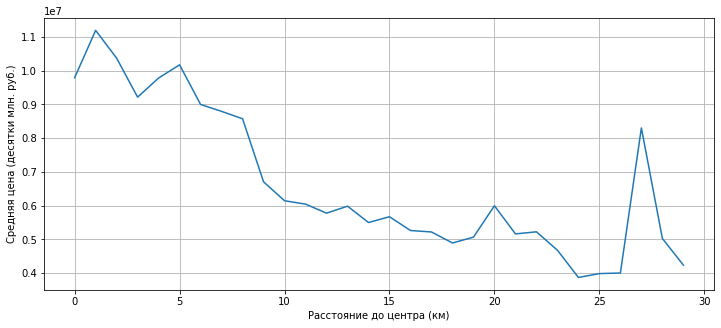

In [199]:
kms_price_pivot['mean'].plot(grid=True, xlabel='Расстояние до центра (км)', ylabel='Средняя цена (десятки млн. руб.)', figsize=(12, 5));

В графике четко заметна зависимость цены от расстояния объектов до центра города.

Но значения первых 3 км и последних 10 км выглядят не такими плавными, т.к. количество этих данных недостаточно для обьективной оценки. 

Наиболее близко расположенные к центру квартиры имеют среднюю цену более 11 млн рублей, когда как наиболее удаленные стоят в среднем всего 4 млн рублей.

Выясним, на сколько процентов объекты становятся дешевле с каждым километром от центра города. 

In [200]:
round((kms_price_pivot['mean'].diff() / kms_price_pivot['mean'].shift() * 100).mean(), 2)

4.63

**Вывод**

Чем ближе объект находится к центру, тем он дороже. В среднем стоимость объекта теряет 4-5% от цены с удалением от центра на 1 километр.

### Общий вывод

Проведенный анализ данных позволил выявить основные факторы, влияющие на стоимость квартир, а также причины возникновения пропущенных значений. Полученные результаты могут быть использованы для дальнейшего улучшения сервиса и повышения качества предоставляемых данных. В ходе проведенного анализа данных были получены следующие результаты:

В датафрейме было пропущено 19,5% данных, что могло сильно повлиять на результаты проведенного исследования. Некоторые данные мы восстановили с помощью медианных значений, другие же мы заполнили нулевыми значениями, где это это было уместно. Но некоторые данные мы вынуждены были оставить с пропущенными значениями, так как не было возможности их восстановить. Необходимо дать обратную связь участвующих в выгрузке данных коллегам о большом количестве пропущенных значений.

После фильтрации данных от выбивающихся значений был проведен анализ таких параметров, как скорость продажи квартир, средняя цена квадратного метра объектов в разных населенных пунктах, средняя цена каждого километра в рассотянии до центра Санкт-Петербурга, а также изучены факторы, влияющие на общую стоимость квартиры.

На рынке недвижимости больше всего представлены квартиры за 3-5 млн рублей с общей площадью 30-50 м², с 1-2 комнатами и высотой потолков 2.65 м, находятся в зданиях старого жилого фонда на этажах, не относящихся к первым и последним. Большинство объектов расположены в пределах 10-16 км от центра города и в 100-600 м от парков.

В среднем большинству объектов требуется 3-6 месяцев для продажи. Продажи, которые были совершены за полмесяца можно считать необычно быстрыми. Объекты, которые были размещены более полутора лет можно считать необычно долгими.

Наибольшее влияние на общую стоимость объекта имеет общая площадь квартиры. Количество комнат и тип этажа имеют некоторую связь с общей стоимостью квартиры, однако она не слишком сильная. Не выявлено никакой зависимости цены объекта от дня недели, месяца и года размещения объявления на сервисе.

В Санкт-Петербурге находится наибольшее количество объявлений и средняя цена за квадратный метр там самая высокая - 110 тыс. рублей. Из представленной выборки самую низкую среднюю стоимость квадратного метра имеет город Выборг - всего 58 тыс. рублей.

Чем ближе объект находится к центру, тем он дороже. В среднем стоимость объекта теряет 4-5% от цены с удалением от центра на 1 километр.